# Saving our Phase Diagram

In our last trial, even though the digram is successfully created, some of the points are not so good as expected.
 - The edge points (or special points), e.g. those points in which any of `Jx, Jy, Jz` is zero.
 - The induced points. In the comb method, we first calculated the line `Jx = Jy`, and then make use of it to induce the following points which deviate from the original line. The overal trend is fine, but the absolute value of entanglement entropy is not so consistent with the result given by an independent computation.

Let's solve them one by one.

## Preparation

The first section is the import zone with no doubt!

In [17]:
""" In this script we will read out the psi for each point from the .h5 fiels in /data folder
"""
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from kitaev_ladder import KitaevLadderModel, load_data, run_atomic
from rotation import get_xyz, decimals

Then select the region we want to specify.
Considering the symmetry of Kitaev ladder, we can just choose the region

`Jx >= 0, Jy >= 0, Jz >= 0`

However, in our control system, the fundamental variables are `a` and `b` given by the following transformation:

`a = Jx + Jy`

`b = Jx - Jy`

which implies that it will be not so easy to use the region just mentioned.

Then we choose another region, `0 <= a <= 1` and `0 <= b <= 1`

In [18]:
a_start = 0
a_end = 1
a_number = 11

b_start = 0
b_end = 1
b_number = 11

a_list = np.linspace(a_start, a_end, a_number)
b_list = np.linspace(b_start, b_end, b_number)

a_list = np.round(a_list, decimals=decimals)
b_list = np.round(a_list, decimals=decimals)

In [19]:
for a in a_list: 
    for b in b_list:
        Jx, Jy, Jz = get_xyz(a, b, biased=False)
        if Jx==0 or Jy==0 or Jz==0:
            print(f"At the point (a, b) = ({a}, {b}), J = ({Jx}, {Jy}, {Jz})")

At the point (a, b) = (0.0, 0.0), J = (0.0, 0.0, 1.0)
At the point (a, b) = (0.0, 1.0), J = (0.5, -0.5, 0.0)
At the point (a, b) = (0.1, 0.1), J = (0.1, 0.0, 0.9)
At the point (a, b) = (0.1, 1.0), J = (0.55, -0.45, 0.0)
At the point (a, b) = (0.2, 0.2), J = (0.2, 0.0, 0.8)
At the point (a, b) = (0.2, 1.0), J = (0.6, -0.4, 0.0)
At the point (a, b) = (0.3, 0.3), J = (0.3, 0.0, 0.7)
At the point (a, b) = (0.3, 1.0), J = (0.65, -0.35, 0.0)
At the point (a, b) = (0.4, 0.4), J = (0.4, 0.0, 0.6)
At the point (a, b) = (0.4, 1.0), J = (0.7, -0.3, 0.0)
At the point (a, b) = (0.5, 0.5), J = (0.5, 0.0, 0.5)
At the point (a, b) = (0.5, 1.0), J = (0.75, -0.25, 0.0)
At the point (a, b) = (0.6, 0.6), J = (0.6, 0.0, 0.4)
At the point (a, b) = (0.6, 1.0), J = (0.8, -0.2, 0.0)
At the point (a, b) = (0.7, 0.7), J = (0.7, 0.0, 0.3)
At the point (a, b) = (0.7, 1.0), J = (0.85, -0.15, 0.0)
At the point (a, b) = (0.8, 0.8), J = (0.8, 0.0, 0.2)
At the point (a, b) = (0.8, 1.0), J = (0.9, -0.1, 0.0)
At the poin

Try calculating all the 121 points with brutal force.

System setting

In [42]:
L = 4
chi = 100
N_sweeps_check=5
max_sweeps=1000
verbose=1

In [39]:
def f(a, b):
    
    Jx, Jy, Jz = get_xyz(a, b)
    
    data = run_atomic(
        Jx=Jx, 
        Jy=Jy, 
        Jz=Jz, 
        L=L, 
        chi=chi, 
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose
    )
    if data==-1:
        print("No data!!!!!!!!!!!!!!!!!!")
        return np.nan
    psi = data['psi']
    
#     sweeps_stat = data['sweeps_stat']
# #     print("Sweeps: ", sweeps_stat['sweep'])
#     last_sweep = len(sweeps_stat['sweep']) * N_sweeps_check
#     max_sweeps = data['parameters']['max_sweeps']
    return float(np.mean(psi.entanglement_entropy()))
    if max_sweeps == last_sweep:
        return np.nan
    else:
        return float(np.mean(psi.entanglement_entropy()))

ff = np.frompyfunc(f, 2, 1)

In [40]:
A, B = np.meshgrid(a_list, b_list)

In [43]:
entanglement_entropy = ff(A, B)

Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.001 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=1.0 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250001249999048, S = nan, norm_err = 3.6e-14
Current memory usage 298.4 MB, time elapsed: 2.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8142e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [11, 10, 8, 11, 8, 10, 8, 11, 10, 10, 11, 9, 8, 11, 9, 11]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250001249999146, S = nan, norm_err = 3.1e-14
Current memory usage 298.7 MB, time elapsed: 6.4 s
Delta E = -1.9762e-15, Delta S = 0.0000e+00 (per sweep)
max_trunc_err

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_par

The norm is:  1.0
The overlap is:  (0.9999999999999996+2.1326256732789872e-16j)
After the canonicalization:
Bond dim =  [4, 8, 6, 8, 6, 8, 4, 8, 5, 8, 5, 8, 4, 8, 5, 8]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.05 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoS

Updating environment
..
sweep 80, age = 3920
Energy = -0.1118254418584144, S = 1.0494538013144696, norm_err = 1.7e-03
Current memory usage 330.2 MB, time elapsed: 329.5 s
Delta E = 1.4766e-04, Delta S = 2.4666e-02 (per sweep)
max_trunc_err = 1.1022e-09, max_E_trunc = -1.7337e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 85, age = 4144
Energy = -0.0969859380045452, S = 1.0950998757743369, norm_err = 4.0e-02
Current memory usage 330.2 MB, time elapsed: 349.4 s
Delta E = 2.9679e-03, Delta S = 9.1292e-03 (per sweep)
max_trunc_err = 1.7656e-09, max_E_trunc = -4.4895e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 90, age = 4368
Energy = -0.1110637556370300, S = 0.9874060506406295, norm_err = 1.3e-03
Current memory usage 330.2 MB, time elapsed: 369.6 s
Delta E = -2.8156e-03, Delta S = -2.1539e-02 (per sweep)
max_trun

Updating environment
..
sweep 170, age = 7952
Energy = -0.1018438198716396, S = 0.9810080007819806, norm_err = 3.2e-02
Current memory usage 330.2 MB, time elapsed: 691.2 s
Delta E = -2.0901e-03, Delta S = -3.9921e-02 (per sweep)
max_trunc_err = 7.1063e-09, max_E_trunc = -1.0232e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 175, age = 8176
Energy = -0.1113494938166681, S = 0.9572125625197130, norm_err = 3.3e-03
Current memory usage 330.2 MB, time elapsed: 711.1 s
Delta E = -1.9011e-03, Delta S = -4.7591e-03 (per sweep)
max_trunc_err = 1.8891e-09, max_E_trunc = -2.5216e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 180, age = 8400
Energy = -0.1109739506329817, S = 0.8926014171733100, norm_err = 2.6e-03
Current memory usage 330.2 MB, time elapsed: 731.2 s
Delta E = 7.5109e-05, Delta S = -1.2922e-02 (per sweep)
ma

Updating environment
..
sweep 260, age = 11984
Energy = -0.0503654102001789, S = 1.2922842941616228, norm_err = 1.7e-01
Current memory usage 330.2 MB, time elapsed: 1053.7 s
Delta E = 1.0308e-02, Delta S = 5.0282e-02 (per sweep)
max_trunc_err = 4.6653e-09, max_E_trunc = -2.0464e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 265, age = 12208
Energy = 0.0711217596592917, S = 3.0827876771175706, norm_err = 5.9e-02
Current memory usage 330.2 MB, time elapsed: 1073.7 s
Delta E = 2.4297e-02, Delta S = 3.5810e-01 (per sweep)
max_trunc_err = 2.6300e-09, max_E_trunc = -7.6170e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 270, age = 12432
Energy = -0.1125412091559639, S = 0.7213424310178382, norm_err = 6.1e-05
Current memory usage 330.6 MB, time elapsed: 1093.9 s
Delta E = -3.6733e-02, Delta S = -4.7229e-01 (per sweep)


Updating environment
..
sweep 350, age = 16016
Energy = -0.1065393880751273, S = 1.0614566529870821, norm_err = 1.0e-02
Current memory usage 331.8 MB, time elapsed: 1413.2 s
Delta E = -1.3793e-02, Delta S = -4.7510e-02 (per sweep)
max_trunc_err = 1.1666e-09, max_E_trunc = 5.9117e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 355, age = 16240
Energy = -0.1127939247183747, S = 0.9813888471233975, norm_err = 8.1e-05
Current memory usage 332.0 MB, time elapsed: 1433.2 s
Delta E = -1.2509e-03, Delta S = -1.6014e-02 (per sweep)
max_trunc_err = 9.6214e-10, max_E_trunc = -4.2587e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 360, age = 16464
Energy = -0.1049673729957590, S = 0.8804887425316554, norm_err = 2.0e-02
Current memory usage 332.3 MB, time elapsed: 1453.2 s
Delta E = 1.5653e-03, Delta S = -2.0180e-02 (per swee

norm_tol=1.00e-05 not reached, norm_err=2.67e-04
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 435 sweeps.
total size = 19952, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000061139032-2.868629541807194e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSit

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0933312166305534, S = nan, norm_err = 8.6e-03
Current memory usage 344.0 MB, time elapsed: 15.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7343e-09, max_E_trunc = 3.0198e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0488896787158719, S = nan, norm_err = 2.2e-01
Current memory usage 344.0 MB, time elapsed: 40.3 s
Delta E = 2.8444e-02, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999983-8.273987235369457e-17j)
After the canonicalization:
Bond dim =  [16, 19, 22, 30, 23, 24, 14, 20, 12, 20, 12, 20, 12, 20, 14, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811891513+4.071569470465164e-13j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827429596121181, S = nan, norm_err = 3.3e-13
Current memory usage 344.0 MB, time elapsed: 7.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1073e-19, max_E_trunc = 7.4607e-14
MPS bond dimensions: [42, 45, 30, 48, 48, 52, 46, 50, 49, 56, 49, 54, 48, 55, 50, 50]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827429596121132, S = nan, norm_err = 6.4e-13
Current memory usage 344.0 MB, time elapsed: 13.4 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071078358780519-2.425562477954802e-12j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760004202140621, S = nan, norm_err = 6.9e-13
Current memory usage 344.0 MB, time elapsed: 7.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0273e-19, max_E_trunc = 8.8818e-15
MPS bond dimensions: [50, 60, 38, 66, 68, 77, 68, 77, 66, 80, 73, 78, 71, 80, 71, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760004202140643, S = nan, norm_err = 9.0e-13
Current memory usage 344.0 MB, time elapsed: 15.9 s
Delta E = -4.4409e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071080368811947+2.2035889461350068e-13j)
After the canonicalization:
Bond dim =  [15, 28, 29, 40, 29, 40, 29, 40, 29, 40, 28, 40, 29, 40, 29, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0715139925305555, S = nan, norm_err = 5.8e-11
Current memory usage 344.0 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8268e-18, max_E_trunc = 1.0658e-14
MPS bond dimensions: [67, 84, 53, 88, 96, 100, 93, 100, 91, 100, 90, 100, 92, 100, 92, 89]
Updating environment
..
sweep 10, age = 784
Energy = -0.0715139925305597, S = nan, norm_err = 7.0e-13
Current memory usage 344.0 MB, time elapsed: 20.5 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.00033813503292664734-0.0003448931327136197j)
After the canonicalization:
Bond dim =  [37, 51, 40, 50, 39, 51, 41, 66, 50, 68, 50, 66, 49, 64, 48, 49]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695233934866190, S = nan, norm_err = 4.4e-09
Current memory usage 344.0 MB, time elapsed: 11.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2117e-15, max_E_trunc = 3.9968e-15
MPS bond dimensions: [100, 100, 77, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695233934866187, S = nan, norm_err = 1.6e-12
Current memory usage 344.0 MB, time elapsed: 21.1 s
Delta E = 4.9960e-17, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999725-8.881784197001252e-16j)
After the canonicalization:
Bond dim =  [56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0701417762772432, S = nan, norm_err = 5.3e-06
Current memory usage 344.0 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2820e-13, max_E_trunc = 2.4980e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0701417762776991, S = nan, norm_err = 4.4e-11
Current memory usage 344.0 MB, time elapsed: 26.0 s
Delta E = -9.1188e-14, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7314882517887569-1.913633331520355e-11j)
After the canonicalization:
Bond dim =  [48, 86, 92, 100, 92, 100, 93, 100, 92, 100, 92, 100, 92, 100, 92, 89]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0734230383213643, S = nan, norm_err = 2.2e-03
Current memory usage 344.1 MB, time elapsed: 18.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1268e-10, max_E_trunc = 8.2983e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0734231110148504, S = nan, norm_err = 4.6e-06
Current memory usage 344.1 MB, time elapsed: 28.9 s
Delta E = -1.4539e-08, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795705460355671, S = nan, norm_err = 8.3e-03
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3969e-09, max_E_trunc = 2.4964e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795767163571095, S = nan, norm_err = 4.1e-03
Current memory usage 353.9 MB, time elapsed: 31.1 s
Delta E = -1.2341e-06, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0795773586656967, S = 1.1516235897517260, norm_err = 4.5e-05
Current memory usage 353.9 MB, time elapsed: 134.2 s
Delta E = -6.3686e-12, Delta S = 7.7900e-05 (per sweep)
max_trunc_err = 6.7527e-07, max_E_trunc = 5.4390e-07
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
norm_tol=1.00e-05 not reached, norm_err=4.51e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.45e-05
Call psi.canonical_form()
DMRG finished after 90 sweeps.
total size = 4688, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047-1.416982314966243e-15j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.05 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0550098670936430, S = nan, norm_err = 1.0e-02
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.6805e-08, max_E_trunc = -1.0859e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0026917519150724, S = nan, norm_err = 1.5e-01
Current memory usage 353.9 MB, time elapsed: 40.4 s
Delta E = 1.1540e-02, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.1121048400168654, S = 0.9135467147946321, norm_err = 1.9e-05
Current memory usage 353.9 MB, time elapsed: 354.3 s
Delta E = -3.2755e-04, Delta S = -1.4099e-02 (per sweep)
max_trunc_err = 1.1755e-09, max_E_trunc = -8.1286e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.1109546412387807, S = 0.7356542098975851, norm_err = 2.4e-03
Current memory usage 353.9 MB, time elapsed: 373.8 s
Delta E = 2.3004e-04, Delta S = -3.5579e-02 (per sweep)
max_trunc_err = 2.5335e-09, max_E_trunc = -4.0927e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1121749980108806, S = 0.9171546464120082, norm_err = 2.9e-05
Current memory usage 353.9 MB, time elapsed: 393.4 s
Delta E = -2.4407e-04, Delta S = 3.6300e-02 (per sweep)
max_t

Updating environment
..
sweep 180, age = 8400
Energy = 0.1449627141125731, S = 3.0099066456181252, norm_err = 2.5e-01
Current memory usage 353.9 MB, time elapsed: 707.3 s
Delta E = 5.1530e-02, Delta S = 4.0548e-01 (per sweep)
max_trunc_err = 2.9343e-09, max_E_trunc = -9.0949e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.1125957831365660, S = 0.8475252084100486, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 726.9 s
Delta E = -5.1512e-02, Delta S = -4.3248e-01 (per sweep)
max_trunc_err = 2.2530e-09, max_E_trunc = -4.0950e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.1111278103463285, S = 0.9085306807273218, norm_err = 2.7e-03
Current memory usage 353.9 MB, time elapsed: 746.5 s
Delta E = 2.9359e-04, Delta S = 1.2201e-02 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = 0.1753615862189761, S = 3.2094703185772406, norm_err = 4.0e-02
Current memory usage 353.9 MB, time elapsed: 1058.5 s
Delta E = 5.7568e-02, Delta S = 4.8100e-01 (per sweep)
max_trunc_err = 1.6218e-08, max_E_trunc = 3.4106e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.1125973756278427, S = 0.8078868254203745, norm_err = 8.4e-05
Current memory usage 353.9 MB, time elapsed: 1077.8 s
Delta E = -5.7592e-02, Delta S = -4.8032e-01 (per sweep)
max_trunc_err = 1.4674e-09, max_E_trunc = -2.2965e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.1126102745574542, S = 0.9088715858794268, norm_err = 4.8e-05
Current memory usage 353.9 MB, time elapsed: 1097.2 s
Delta E = -2.5798e-06, Delta S = 2.0197e-02 (per sweep)


Updating environment
..
sweep 360, age = 16464
Energy = -0.1117357582139675, S = 0.9020029452729430, norm_err = 2.3e-05
Current memory usage 353.9 MB, time elapsed: 1410.0 s
Delta E = 1.8631e-04, Delta S = -1.0547e-02 (per sweep)
max_trunc_err = 1.2788e-08, max_E_trunc = -8.4810e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 365, age = 16688
Energy = -0.1102884613560420, S = 0.9835498739923565, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 1429.5 s
Delta E = 2.8946e-04, Delta S = 1.6309e-02 (per sweep)
max_trunc_err = 3.2536e-09, max_E_trunc = -1.3165e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 370, age = 16912
Energy = -0.1118159881349499, S = 1.0042524506568398, norm_err = 1.2e-03
Current memory usage 353.9 MB, time elapsed: 1449.0 s
Delta E = -3.0551e-04, Delta S = 4.1405e-03 (per sweep)

Updating environment
..
sweep 450, age = 20496
Energy = 0.1034424695564979, S = 2.2172322988099857, norm_err = 4.9e-01
Current memory usage 353.9 MB, time elapsed: 1761.0 s
Delta E = 4.2594e-02, Delta S = 2.4107e-01 (per sweep)
max_trunc_err = 2.9762e-09, max_E_trunc = -1.4097e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 455, age = 20720
Energy = -0.1125902800750822, S = 0.8796431576577723, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 1780.4 s
Delta E = -4.3207e-02, Delta S = -2.6752e-01 (per sweep)
max_trunc_err = 1.9323e-09, max_E_trunc = -7.3214e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 460, age = 20944
Energy = -0.1106870241898434, S = 0.9370882042431079, norm_err = 4.9e-04
Current memory usage 353.9 MB, time elapsed: 1801.9 s
Delta E = 3.8065e-04, Delta S = 1.1489e-02 (per sweep)


Updating environment
..
sweep 540, age = 24528
Energy = -0.1011450353758221, S = 1.0435238891198271, norm_err = 2.9e-02
Current memory usage 353.9 MB, time elapsed: 2123.7 s
Delta E = 1.0692e-03, Delta S = 1.7568e-02 (per sweep)
max_trunc_err = 4.8603e-09, max_E_trunc = 9.0949e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 545, age = 24752
Energy = -0.1121940432299340, S = 0.9178876719817932, norm_err = 6.1e-04
Current memory usage 353.9 MB, time elapsed: 2143.5 s
Delta E = -2.2098e-03, Delta S = -2.5127e-02 (per sweep)
max_trunc_err = 4.5601e-09, max_E_trunc = -2.1828e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 550, age = 24976
Energy = -0.1113823209369116, S = 0.9501327483794453, norm_err = 3.0e-03
Current memory usage 353.9 MB, time elapsed: 2163.3 s
Delta E = 1.6234e-04, Delta S = 6.4490e-03 (per sweep)


Updating environment
..
sweep 630, age = 28560
Energy = -0.0879585479696630, S = 1.1072828629608824, norm_err = 8.1e-02
Current memory usage 353.9 MB, time elapsed: 2483.1 s
Delta E = 4.8569e-03, Delta S = 5.1719e-02 (per sweep)
max_trunc_err = 1.0038e-09, max_E_trunc = -2.8240e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 635, age = 28784
Energy = -0.1110948640692300, S = 0.9615176083526884, norm_err = 1.8e-03
Current memory usage 353.9 MB, time elapsed: 2503.1 s
Delta E = -4.6273e-03, Delta S = -2.9153e-02 (per sweep)
max_trunc_err = 4.8553e-09, max_E_trunc = -1.1687e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 640, age = 29008
Energy = 0.1657099178060832, S = 2.5920382448496326, norm_err = 4.7e-01
Current memory usage 353.9 MB, time elapsed: 2523.0 s
Delta E = 5.5361e-02, Delta S = 3.2610e-01 (per sweep)


Updating environment
..
sweep 720, age = 32592
Energy = 0.1755546845796516, S = 2.5152400434744075, norm_err = 5.2e-01
Current memory usage 353.9 MB, time elapsed: 2840.9 s
Delta E = 5.2717e-02, Delta S = 2.8734e-01 (per sweep)
max_trunc_err = 7.8934e-09, max_E_trunc = 1.1823e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 725, age = 32816
Energy = -0.1119107788091753, S = 0.9311122368946245, norm_err = 5.7e-05
Current memory usage 353.9 MB, time elapsed: 2860.6 s
Delta E = -5.7493e-02, Delta S = -3.1683e-01 (per sweep)
max_trunc_err = 1.1250e-09, max_E_trunc = -1.4552e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 730, age = 33040
Energy = -0.0797728861478930, S = 1.1815142054384522, norm_err = 6.7e-02
Current memory usage 353.9 MB, time elapsed: 2880.3 s
Delta E = 6.4276e-03, Delta S = 5.0080e-02 (per sweep)
m

Updating environment
..
sweep 810, age = 36624
Energy = -0.0489679049230318, S = 1.2758650777703877, norm_err = 2.0e-01
Current memory usage 353.9 MB, time elapsed: 3195.9 s
Delta E = 1.2645e-02, Delta S = 6.4669e-02 (per sweep)
max_trunc_err = 3.1550e-09, max_E_trunc = 4.5475e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 815, age = 36848
Energy = -0.1123568632317955, S = 0.8482547060282968, norm_err = 6.3e-04
Current memory usage 353.9 MB, time elapsed: 3215.6 s
Delta E = -1.2678e-02, Delta S = -8.5522e-02 (per sweep)
max_trunc_err = 1.7101e-09, max_E_trunc = -1.4688e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 820, age = 37072
Energy = 0.1083245955576899, S = 2.2472901403894650, norm_err = 4.7e-01
Current memory usage 353.9 MB, time elapsed: 3235.3 s
Delta E = 4.4136e-02, Delta S = 2.7981e-01 (per sweep)
m

Updating environment
..
sweep 900, age = 40656
Energy = -0.1103434035181294, S = 0.9464222634320143, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 3551.0 s
Delta E = 4.7466e-04, Delta S = 1.0140e-02 (per sweep)
max_trunc_err = 6.6882e-09, max_E_trunc = 9.0949e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 905, age = 40880
Energy = -0.1121032982250370, S = 0.8934464966324420, norm_err = 9.5e-05
Current memory usage 353.9 MB, time elapsed: 3570.7 s
Delta E = -3.5198e-04, Delta S = -1.0595e-02 (per sweep)
max_trunc_err = 3.5620e-09, max_E_trunc = -1.3733e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 910, age = 41104
Energy = -0.0869799662451669, S = 1.0885580923825231, norm_err = 6.3e-02
Current memory usage 353.9 MB, time elapsed: 3590.4 s
Delta E = 5.0247e-03, Delta S = 3.9022e-02 (per sweep)


Updating environment
..
sweep 990, age = 44688
Energy = -0.1124449180904037, S = 0.9582502760317770, norm_err = 5.4e-05
Current memory usage 353.9 MB, time elapsed: 3904.7 s
Delta E = -9.7278e-03, Delta S = -7.6866e-02 (per sweep)
max_trunc_err = 7.0801e-09, max_E_trunc = 7.2760e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 995, age = 44912
Energy = -0.1125832624779264, S = 0.9971605178376710, norm_err = 3.3e-05
Current memory usage 353.9 MB, time elapsed: 3924.4 s
Delta E = -2.7669e-05, Delta S = 7.7820e-03 (per sweep)
max_trunc_err = 3.3980e-09, max_E_trunc = -6.9758e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 1000, age = 45136
Energy = 0.1932685216546588, S = 2.5600363348666315, norm_err = 3.7e-01
Current memory usage 353.9 MB, time elapsed: 3944.1 s
Delta E = 6.1170e-02, Delta S = 3.1258e-01 (per sweep)

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
DMRG finished after 1000 sweeps.
total size = 45264, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000003294311+3.8063421362644334e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.9 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config Tw

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128544303906123, S = nan, norm_err = 2.4e-08
Current memory usage 353.9 MB, time elapsed: 15.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.6833e-13, max_E_trunc = 5.3291e-15
MPS bond dimensions: [100, 64, 85, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128544324608909, S = nan, norm_err = 1.5e-08
Current memory usage 353.9 MB, time elapsed: 38.4 s
Delta E = -4.1406e-10, Delta S = 0.0000e+00 (p

DMRG finished after 85 sweeps.
total size = 4144, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000482231+2.0658904450009356e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0947841238074490, S = nan, norm_err = 4.5e-03
Current memory usage 353.9 MB, time elapsed: 15.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.2885e-09, max_E_trunc = 2.1316e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0919661532872889, S = nan, norm_err = 9.3e-03
Current memory usage 353.9 MB, time elapsed: 38.1 s
Delta E = 5.6359e-04, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.1011480067332737, S = 0.8319933882250007, norm_err = 8.1e-06
Current memory usage 353.9 MB, time elapsed: 328.8 s
Delta E = -8.7702e-03, Delta S = -9.9127e-02 (per sweep)
max_trunc_err = 3.7396e-08, max_E_trunc = 3.4106e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = 0.0878905758158730, S = 2.2914937983702202, norm_err = 3.7e-01
Current memory usage 353.9 MB, time elapsed: 347.7 s
Delta E = 3.7808e-02, Delta S = 2.9190e-01 (per sweep)
max_trunc_err = 8.2815e-09, max_E_trunc = 9.6634e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0636122633671743, S = 1.1461212740754179, norm_err = 1.3e-01
Current memory usage 353.9 MB, time elapsed: 367.9 s
Delta E = -3.0301e-02, Delta S = -2.2907e-01 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000006587271+5.03076447812051e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914073169287404, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 5.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0368e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [27, 33, 20, 34, 34, 39, 33, 40, 34, 43, 40, 43, 37, 41, 38, 31]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914073169287442, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 11.9 s
Delta E = -7.4385e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865507-7.875663215659544e-15j)
After the canonicalization:
Bond dim =  [7, 14, 14, 24, 14, 20, 14, 24, 14, 20, 14, 24, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827869489328047, S = nan, norm_err = 4.4e-13
Current memory usage 353.9 MB, time elapsed: 7.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2075e-20, max_E_trunc = 2.6645e-14
MPS bond dimensions: [37, 42, 31, 45, 46, 54, 50, 58, 52, 56, 49, 54, 45, 51, 41, 46]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827869489327995, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 15.3 s
Delta E = 1.0436e-15, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.707130601490469-9.989120154224612e-13j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 24, 22, 28, 22, 24, 22, 28, 22, 24, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760914248439678, S = nan, norm_err = 3.2e-12
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2515e-19, max_E_trunc = 1.9540e-14
MPS bond dimensions: [51, 60, 40, 65, 66, 79, 70, 80, 72, 84, 70, 84, 71, 81, 68, 64]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760914248439721, S = nan, norm_err = 6.5e-13
Current memory usage 353.9 MB, time elapsed: 18.2 s
Delta E = -8.6597e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7085093002765496+6.431024538177065e-13j)
After the canonicalization:
Bond dim =  [15, 30, 30, 40, 30, 44, 30, 40, 30, 44, 30, 40, 30, 44, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0716813529449210, S = nan, norm_err = 3.4e-10
Current memory usage 353.9 MB, time elapsed: 12.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1234e-18, max_E_trunc = 2.1316e-14
MPS bond dimensions: [69, 84, 57, 95, 94, 100, 93, 100, 94, 99, 93, 100, 95, 100, 92, 91]
Updating environment
..
sweep 10, age = 784
Energy = -0.0716813529449190, S = nan, norm_err = 8.6e-13
Current memory usage 353.9 MB, time elapsed: 24.9 s
Delta E = 3.9968e-16, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811873077+3.1633029529132273e-13j)
After the canonicalization:
Bond dim =  [21, 42, 42, 52, 42, 60, 42, 52, 42, 60, 42, 52, 42, 60, 42, 39]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0698051184245831, S = nan, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6473e-15, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 81, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0698051184246089, S = nan, norm_err = 6.5e-12
Current memory usage 353.9 MB, time elapsed: 26.8 s
Delta E = -5.1514e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.00010013075376634069+3.558453115468224e-05j)
After the canonicalization:
Bond dim =  [49, 52, 45, 48, 48, 62, 62, 72, 63, 72, 63, 66, 58, 68, 59, 63]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0705936300166286, S = nan, norm_err = 1.3e-03
Current memory usage 353.9 MB, time elapsed: 18.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8565e-12, max_E_trunc = 8.8818e-13
MPS bond dimensions: [100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0705936505307656, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 29.8 s
Delta E = -4.1028e-09, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071283292956261-2.8817361572773233e-11j)
After the canonicalization:
Bond dim =  [48, 88, 91, 100, 90, 100, 94, 100, 91, 100, 93, 100, 91, 100, 94, 86]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0741868946135747, S = nan, norm_err = 3.6e-03
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9457e-11, max_E_trunc = 2.3407e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0741881935419244, S = nan, norm_err = 1.9e-03
Current memory usage 353.9 MB, time elapsed: 35.4 s
Delta E = -2.5979e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0741885232279227, S = 1.5140991105934645, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 143.8 s
Delta E = 2.3309e-12, Delta S = 4.4417e-04 (per sweep)
max_trunc_err = 1.2458e-08, max_E_trunc = 1.2444e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0741885233511290, S = 1.5160160518472119, norm_err = 8.3e-05
Current memory usage 353.9 MB, time elapsed: 149.7 s
Delta E = -2.4641e-11, Delta S = 3.8339e-04 (per sweep)
max_trunc_err = 1.2937e-08, max_E_trunc = 1.2867e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0741885234411441, S = 1.5176949989960560, norm_err = 7.2e-05
Current memory usage 353.9 MB, time elapsed: 155.7 s
Delta E = -1.8003e-11, Delta S = 3.3579e-04 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.37e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000047+4.90977832568918e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.45 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0808502623647402, S = nan, norm_err = 7.5e-07
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5238e-11, max_E_trunc = 1.0420e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0808502626149714, S = nan, norm_err = 4.7e-07
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = -5.0046e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0808502760033392, S = 0.7369007314299059, norm_err = 1.6e-07
Current memory usage 353.9 MB, time elapsed: 352.8 s
Delta E = -1.6623e-10, Delta S = 3.8720e-03 (per sweep)
max_trunc_err = 4.4703e-11, max_E_trunc = 4.4565e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0808502766631420, S = 0.7521585984639401, norm_err = 1.3e-07
Current memory usage 353.9 MB, time elapsed: 372.3 s
Delta E = -1.3196e-10, Delta S = 3.0516e-03 (per sweep)
max_trunc_err = 2.9668e-11, max_E_trunc = 3.5925e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0808502774684445, S = 0.7709801216556225, norm_err = 3.7e-07
Current memory usage 353.9 MB, time elapsed: 391.9 s
Delta E = -1.6106e-10, Delta S = 3.7643e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0808502897950625, S = 1.0147803039125618, norm_err = 1.7e-07
Current memory usage 353.9 MB, time elapsed: 693.8 s
Delta E = -2.0985e-10, Delta S = 3.2776e-03 (per sweep)
max_trunc_err = 6.5911e-11, max_E_trunc = 8.0149e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0808502905231840, S = 1.0259504823835022, norm_err = 2.9e-07
Current memory usage 353.9 MB, time elapsed: 712.9 s
Delta E = -1.4562e-10, Delta S = 2.2340e-03 (per sweep)
max_trunc_err = 7.2109e-11, max_E_trunc = 8.6402e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0808502910295061, S = 1.0333263532346488, norm_err = 2.7e-07
Current memory usage 353.9 MB, time elapsed: 731.9 s
Delta E = -1.0126e-10, Delta S = 1.4752e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0808502987555855, S = 1.1109503276191619, norm_err = 3.0e-07
Current memory usage 353.9 MB, time elapsed: 991.5 s
Delta E = -6.7375e-11, Delta S = 4.3241e-04 (per sweep)
max_trunc_err = 5.8492e-11, max_E_trunc = 5.6161e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0808502992891995, S = 1.1142456078953467, norm_err = 6.1e-07
Current memory usage 353.9 MB, time elapsed: 1008.1 s
Delta E = -1.0672e-10, Delta S = 6.5906e-04 (per sweep)
max_trunc_err = 7.0123e-11, max_E_trunc = 7.1736e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0808502995683611, S = 1.1159797001066636, norm_err = 9.2e-07
Current memory usage 353.9 MB, time elapsed: 1024.0 s
Delta E = -5.5832e-11, Delta S = 3.4682e-04 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000189+6.35017267122078e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.1 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015446506075006, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 10.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8055e-19, max_E_trunc = 4.0856e-14
MPS bond dimensions: [23, 27, 17, 28, 33, 39, 32, 32, 26, 28, 27, 34, 30, 36, 35, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015446506075035, S = nan, norm_err = 8.6e-13
Current memory usage 353.9 MB, time elapsed: 15.4 s
Delta E = -5.7732e-16, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987-3.184665183323217e-16j)
After the canonicalization:
Bond dim =  [12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20, 12, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.1394714440504496, S = nan, norm_err = 1.5e-01
Current memory usage 353.9 MB, time elapsed: 13.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6656e-11, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 86, 79, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0703926156190628, S = nan, norm_err = 8.1e-05
Current memory usage 353.9 MB, time elapsed: 35.9 s
Delta E = -4.1973e-02, Delta S = 0.0000e+00 (pe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000002227-2.369913483122807e-17j)
After the canonicalization:
Bond dim =  [100, 98, 99, 87, 85, 96, 97, 99, 97, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.8 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015715720308434, S = nan, norm_err = 1.8e-05
Current memory usage 353.9 MB, time elapsed: 16.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2726e-10, max_E_trunc = -4.8672e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = 0.0952133588341382, S = nan, norm_err = 2.4e-01
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = 3.9357e-02, Delta S = 0.0000e+00 (

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914639969826292, S = nan, norm_err = 1.7e-12
Current memory usage 353.9 MB, time elapsed: 7.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6535e-19, max_E_trunc = 2.8422e-14
MPS bond dimensions: [27, 30, 22, 43, 40, 42, 37, 42, 37, 41, 36, 43, 35, 41, 34, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914639969826334, S = nan, norm_err = 8.7e-13
Current memory usage 353.9 MB, time elapsed: 13.3 s
Delta E = -8.4377e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865757-1.7486012637846216e-15j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0829250441965687, S = nan, norm_err = 3.7e-11
Current memory usage 353.9 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.9766e-18, max_E_trunc = 1.0658e-14
MPS bond dimensions: [42, 48, 33, 55, 56, 62, 53, 61, 53, 57, 51, 58, 49, 60, 53, 52]
Updating environment
..
sweep 10, age = 784
Energy = -0.0829250441965910, S = nan, norm_err = 1.4e-12
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = -4.4631e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865622+4.285460875053104e-14j)
After the canonicalization:
Bond dim =  [11, 20, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0763794698058446, S = nan, norm_err = 1.3e-10
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2766e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [51, 61, 40, 66, 72, 79, 71, 88, 72, 82, 75, 90, 74, 86, 74, 66]
Updating environment
..
sweep 10, age = 784
Energy = -0.0763794698058475, S = nan, norm_err = 7.7e-13
Current memory usage 353.9 MB, time elapsed: 18.9 s
Delta E = -5.8842e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865358-3.319566843629218e-14j)
After the canonicalization:
Bond dim =  [15, 30, 30, 40, 30, 36, 30, 40, 30, 36, 30, 40, 30, 36, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0722161319349126, S = nan, norm_err = 3.1e-07
Current memory usage 353.9 MB, time elapsed: 13.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6004e-17, max_E_trunc = 3.1974e-14
MPS bond dimensions: [75, 93, 60, 100, 100, 100, 97, 100, 100, 100, 96, 100, 99, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0722161319349082, S = nan, norm_err = 2.4e-12
Current memory usage 353.9 MB, time elapsed: 23.9 s
Delta E = 8.8818e-16, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7121661655017189-1.8480468571368737e-13j)
After the canonicalization:
Bond dim =  [24, 44, 47, 64, 47, 60, 47, 64, 48, 60, 46, 64, 47, 60, 46, 45]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0707195022451110, S = nan, norm_err = 6.1e-04
Current memory usage 353.9 MB, time elapsed: 17.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7658e-14, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 88, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0707195061202751, S = nan, norm_err = 2.5e-07
Current memory usage 353.9 MB, time elapsed: 28.2 s
Delta E = -7.7503e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7072235268157913+1.1838579026656444e-10j)
After the canonicalization:
Bond dim =  [39, 74, 76, 100, 77, 92, 76, 100, 76, 92, 76, 100, 76, 92, 76, 76]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0721399537166245, S = nan, norm_err = 3.8e-03
Current memory usage 353.9 MB, time elapsed: 16.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1657e-12, max_E_trunc = 7.4962e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0721410862635401, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 33.6 s
Delta E = -2.2651e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0721413828034159, S = 1.4713129468585979, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 143.5 s
Delta E = -5.6826e-11, Delta S = 7.0135e-04 (per sweep)
max_trunc_err = 3.4908e-09, max_E_trunc = 2.7773e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0721413830290949, S = 1.4745155429386827, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 149.2 s
Delta E = -4.5136e-11, Delta S = 6.4052e-04 (per sweep)
max_trunc_err = 3.6671e-09, max_E_trunc = 2.9124e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0721413832057909, S = 1.4773982016993537, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 154.9 s
Delta E = -3.5339e-11, Delta S = 5.7653e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0721413840347260, S = 1.5018285904080892, norm_err = 3.3e-05
Current memory usage 353.9 MB, time elapsed: 247.9 s
Delta E = -4.5226e-12, Delta S = 1.3293e-04 (per sweep)
max_trunc_err = 5.3698e-09, max_E_trunc = 4.2020e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0721413840267999, S = 1.5025864704933314, norm_err = 3.2e-05
Current memory usage 353.9 MB, time elapsed: 253.7 s
Delta E = 1.5852e-12, Delta S = 1.5158e-04 (per sweep)
max_trunc_err = 5.4018e-09, max_E_trunc = 4.2280e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0721413840488907, S = 1.5032037349185001, norm_err = 2.2e-05
Current memory usage 353.9 MB, time elapsed: 259.6 s
Delta E = -4.4182e-12, Delta S = 1.2345e-04 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.48e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 205 sweeps.
total size = 9840, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000027+1.7468459344834913e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'st

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0767791072624272, S = nan, norm_err = 5.6e-06
Current memory usage 353.9 MB, time elapsed: 15.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0251e-12, max_E_trunc = 6.5725e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0767791072732908, S = nan, norm_err = 4.1e-09
Current memory usage 353.9 MB, time elapsed: 25.4 s
Delta E = -2.1727e-12, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000173+1.8499344490077239e-16j)
After the canonicalization:
Bond dim =  [84, 100, 84, 100, 84, 100, 84, 100, 85, 100, 84, 100, 84, 100, 84, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.4 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835963655331990, S = nan, norm_err = 1.1e-08
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.7251e-13, max_E_trunc = 9.7880e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0835963655659437, S = nan, norm_err = 7.1e-09
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = -6.5489e-12, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999996-5.438860347091077e-16j)
After the canonicalization:
Bond dim =  [100, 99, 100, 100, 100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.15 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0913891222963743, S = nan, norm_err = 7.7e-13
Current memory usage 353.9 MB, time elapsed: 8.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2820e-19, max_E_trunc = 1.5987e-14
MPS bond dimensions: [27, 32, 19, 32, 41, 41, 37, 40, 39, 42, 44, 41, 35, 41, 35, 30]
Updating environment
..
sweep 10, age = 784
Energy = -0.0913891222963712, S = nan, norm_err = 7.9e-13
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071068092958104-5.786011172389188e-13j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914073169287429, S = nan, norm_err = 1.7e-12
Current memory usage 353.9 MB, time elapsed: 8.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7136e-19, max_E_trunc = 2.6645e-14
MPS bond dimensions: [29, 31, 24, 37, 34, 42, 37, 41, 32, 41, 36, 38, 36, 40, 32, 32]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914073169287408, S = nan, norm_err = 1.3e-12
Current memory usage 353.9 MB, time elapsed: 13.9 s
Delta E = 4.2188e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811866019-6.616929226765933e-14j)
After the canonicalization:
Bond dim =  [7, 14, 14, 24, 14, 20, 14, 24, 14, 20, 14, 24, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0914639969826304, S = nan, norm_err = 1.9e-12
Current memory usage 353.9 MB, time elapsed: 7.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3832e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [28, 32, 23, 39, 41, 40, 38, 45, 37, 41, 41, 42, 40, 39, 37, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.0914639969826314, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = -2.1094e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.707106781208044+1.3820666833197492e-11j)
After the canonicalization:
Bond dim =  [7, 14, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 20, 14, 14]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.7 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0904672901078701, S = nan, norm_err = 9.2e-05
Current memory usage 353.9 MB, time elapsed: 17.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.2174e-09, max_E_trunc = -3.9080e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0913465118488004, S = nan, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 40.3 s
Delta E = -1.7584e-04, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0831785603935985, S = nan, norm_err = 1.6e-10
Current memory usage 353.9 MB, time elapsed: 10.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9973e-18, max_E_trunc = 1.5987e-14
MPS bond dimensions: [47, 43, 35, 60, 71, 79, 68, 82, 71, 73, 65, 73, 67, 72, 70, 62]
Updating environment
..
sweep 10, age = 784
Energy = -0.0831785603936079, S = nan, norm_err = 4.6e-13
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = -1.8874e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865972-1.1335377081422848e-13j)
After the canonicalization:
Bond dim =  [11, 22, 22, 32, 22, 28, 22, 32, 22, 28, 22, 32, 22, 28, 22, 22]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0769185383908714, S = nan, norm_err = 4.1e-08
Current memory usage 353.9 MB, time elapsed: 13.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0024e-16, max_E_trunc = 4.8850e-15
MPS bond dimensions: [62, 75, 46, 78, 85, 100, 83, 97, 89, 97, 84, 99, 87, 93, 84, 77]
Updating environment
..
sweep 10, age = 784
Energy = -0.0769185383908729, S = nan, norm_err = 3.7e-12
Current memory usage 353.9 MB, time elapsed: 21.5 s
Delta E = -3.1086e-16, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071068118364243-4.9771172019917945e-12j)
After the canonicalization:
Bond dim =  [18, 34, 36, 48, 36, 48, 36, 48, 36, 48, 36, 48, 36, 48, 36, 36]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0732423174127005, S = nan, norm_err = 2.5e-04
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.2062e-15, max_E_trunc = 2.3093e-14
MPS bond dimensions: [97, 100, 75, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0732423180091757, S = nan, norm_err = 3.2e-08
Current memory usage 353.9 MB, time elapsed: 27.8 s
Delta E = -1.1930e-10, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.15233488468062645-0.054427589225086795j)
After the canonicalization:
Bond dim =  [50, 56, 51, 62, 55, 58, 55, 62, 51, 56, 52, 60, 54, 56, 52, 56]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0725871801749490, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.7867e-14, max_E_trunc = 6.3949e-14
MPS bond dimensions: [100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0725881211126631, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 35.1 s
Delta E = -1.8819e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0725883767718738, S = 1.4461259823462103, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 162.0 s
Delta E = -6.1061e-11, Delta S = 8.2461e-04 (per sweep)
max_trunc_err = 1.0776e-09, max_E_trunc = 8.1087e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0725883770231448, S = 1.4499582532544364, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 168.0 s
Delta E = -5.0254e-11, Delta S = 7.6645e-04 (per sweep)
max_trunc_err = 1.1480e-09, max_E_trunc = 8.5947e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0725883772315132, S = 1.4535039570353963, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 173.8 s
Delta E = -4.1674e-11, Delta S = 7.0914e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0725883783508898, S = 1.4871868407025968, norm_err = 3.9e-05
Current memory usage 353.9 MB, time elapsed: 270.5 s
Delta E = -3.5300e-12, Delta S = 1.7649e-04 (per sweep)
max_trunc_err = 2.0509e-09, max_E_trunc = 1.3872e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0725883783650474, S = 1.4889744413296224, norm_err = 1.0e-04
Current memory usage 353.9 MB, time elapsed: 276.5 s
Delta E = -2.8315e-12, Delta S = 3.5752e-04 (per sweep)
max_trunc_err = 2.0882e-09, max_E_trunc = 1.4109e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0725883783492058, S = 1.4890738495049702, norm_err = 1.1e-04
Current memory usage 353.9 MB, time elapsed: 283.0 s
Delta E = 3.1683e-12, Delta S = 1.9882e-05 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.00e-04
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 190 sweeps.
total size = 9168, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999968-5.815396415868249e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'sta

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193676639, S = nan, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.4063e-13, max_E_trunc = 1.4211e-14
MPS bond dimensions: [100, 100, 88, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687055, S = nan, norm_err = 2.9e-09
Current memory usage 353.9 MB, time elapsed: 24.6 s
Delta E = -2.0831e-13, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.99999999999999+1.0191364896092181e-15j)
After the canonicalization:
Bond dim =  [65, 88, 65, 88, 64, 87, 64, 88, 65, 86, 65, 88, 65, 87, 64, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0804731256776228, S = nan, norm_err = 2.6e-07
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.9161e-14, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0804731257164129, S = nan, norm_err = 2.9e-09
Current memory usage 353.9 MB, time elapsed: 31.2 s
Delta E = -7.7580e-12, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999774-3.177915152167629e-16j)
After the canonicalization:
Bond dim =  [50, 74, 50, 68, 50, 75, 50, 68, 50, 75, 50, 68, 50, 74, 50, 68]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.35 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0872549603633003, S = nan, norm_err = 1.8e-09
Current memory usage 353.9 MB, time elapsed: 16.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2353e-14, max_E_trunc = 1.1102e-15
MPS bond dimensions: [100, 97, 70, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0872549602771449, S = nan, norm_err = 4.3e-09
Current memory usage 353.9 MB, time elapsed: 38.9 s
Delta E = 1.7231e-11, Delta S = 0.0000e+00 (pe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999933-8.30122407506281e-16j)
After the canonicalization:
Bond dim =  [92, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 94, 99, 90, 97]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.2 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827429596121163, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 6.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0618e-19, max_E_trunc = 1.7764e-14
MPS bond dimensions: [41, 44, 32, 45, 42, 53, 48, 50, 50, 53, 52, 52, 52, 54, 49, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827429596121114, S = nan, norm_err = 6.1e-13
Current memory usage 353.9 MB, time elapsed: 12.6 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865547+8.1601392309949e-15j)
After the canonicalization:
Bond dim =  [11, 20, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 28, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827869489328004, S = nan, norm_err = 7.5e-13
Current memory usage 353.9 MB, time elapsed: 7.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6893e-20, max_E_trunc = 1.2434e-14
MPS bond dimensions: [39, 43, 32, 47, 44, 55, 49, 57, 49, 55, 46, 55, 49, 50, 43, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0827869489328021, S = nan, norm_err = 1.4e-12
Current memory usage 353.9 MB, time elapsed: 13.4 s
Delta E = -3.5527e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7212213287699016-1.0513245861225177e-12j)
After the canonicalization:
Bond dim =  [11, 21, 22, 28, 22, 24, 22, 28, 22, 24, 22, 28, 22, 24, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0829250441965872, S = nan, norm_err = 2.8e-11
Current memory usage 353.9 MB, time elapsed: 8.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1948e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [41, 44, 33, 51, 49, 54, 52, 56, 52, 58, 57, 60, 57, 58, 54, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.0829250441965861, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = 2.2204e-16, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865924-1.0746958878371515e-13j)
After the canonicalization:
Bond dim =  [11, 22, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 32, 22, 20]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0831785603935693, S = nan, norm_err = 7.7e-10
Current memory usage 353.9 MB, time elapsed: 12.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9374e-17, max_E_trunc = 3.3751e-14
MPS bond dimensions: [46, 45, 34, 60, 63, 65, 59, 63, 60, 60, 68, 85, 79, 86, 78, 65]
Updating environment
..
sweep 10, age = 784
Energy = -0.0831785603936126, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 18.1 s
Delta E = -8.6597e-15, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.3702305894248705e-05-8.078683791088979e-06j)
After the canonicalization:
Bond dim =  [19, 24, 16, 27, 17, 28, 20, 29, 22, 38, 24, 37, 24, 35, 24, 27]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.6 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0836195476092534, S = nan, norm_err = 2.7e-04
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0605e-09, max_E_trunc = -3.3520e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0836160212907107, S = nan, norm_err = 1.3e-04
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = 7.0526e-07, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999811404-2.0520558993361582e-16j)
After the canonicalization:
Bond dim =  [100, 98, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0778429195943069, S = nan, norm_err = 8.3e-05
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0565e-14, max_E_trunc = 1.3323e-14
MPS bond dimensions: [100, 99, 80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0778429196659003, S = nan, norm_err = 4.1e-09
Current memory usage 353.9 MB, time elapsed: 28.2 s
Delta E = -1.4319e-11, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7900103194477611+2.2831776659943658e-12j)
After the canonicalization:
Bond dim =  [42, 58, 42, 42, 25, 40, 43, 64, 42, 58, 42, 64, 42, 58, 42, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0751461541511236, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.6238e-13, max_E_trunc = 3.0198e-14
MPS bond dimensions: [100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 99, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0751469462143428, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 34.1 s
Delta E = -1.5841e-07, Delta S = 0.0000e+00 (pe

Updating environment
..
sweep 90, age = 4368
Energy = -0.0751471642978938, S = 1.4315843491087028, norm_err = 1.8e-04
Current memory usage 353.9 MB, time elapsed: 156.2 s
Delta E = -5.6475e-11, Delta S = 8.9356e-04 (per sweep)
max_trunc_err = 4.7937e-10, max_E_trunc = 3.3293e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0751471645334956, S = 1.4357312895659868, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 162.1 s
Delta E = -4.7120e-11, Delta S = 8.2939e-04 (per sweep)
max_trunc_err = 5.1510e-10, max_E_trunc = 3.5465e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0751471647328916, S = 1.4396023379611285, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 168.2 s
Delta E = -3.9879e-11, Delta S = 7.7421e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0751471658718899, S = 1.4793874890356780, norm_err = 6.1e-05
Current memory usage 353.9 MB, time elapsed: 268.5 s
Delta E = -4.8367e-12, Delta S = 3.0727e-04 (per sweep)
max_trunc_err = 1.0198e-09, max_E_trunc = 6.7075e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0751471658918632, S = 1.4810204395913491, norm_err = 8.0e-05
Current memory usage 353.9 MB, time elapsed: 274.5 s
Delta E = -3.9947e-12, Delta S = 3.2659e-04 (per sweep)
max_trunc_err = 1.0424e-09, max_E_trunc = 6.8474e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0751471659112184, S = 1.4824365675503028, norm_err = 5.9e-05
Current memory usage 353.9 MB, time elapsed: 280.8 s
Delta E = -3.8710e-12, Delta S = 2.8323e-04 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0751471660491134, S = 1.4989818363063387, norm_err = 3.6e-05
Current memory usage 353.9 MB, time elapsed: 381.0 s
Delta E = -5.7057e-13, Delta S = 1.4470e-04 (per sweep)
max_trunc_err = 1.3234e-09, max_E_trunc = 8.5834e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0751471660493372, S = 1.4996968662526851, norm_err = 4.0e-05
Current memory usage 353.9 MB, time elapsed: 387.4 s
Delta E = -4.4764e-14, Delta S = 1.4301e-04 (per sweep)
max_trunc_err = 1.3393e-09, max_E_trunc = 8.6720e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0751471660553271, S = 1.5003525517014265, norm_err = 4.4e-05
Current memory usage 353.9 MB, time elapsed: 393.6 s
Delta E = -1.1980e-12, Delta S = 1.3114e-04 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 4.02e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 315 sweeps.
total size = 14768, maximum chi = 100
Before the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000018+2.6487357035425066e-16j)
After the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 's

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0761734585445395, S = nan, norm_err = 1.0e-06
Current memory usage 353.9 MB, time elapsed: 14.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7651e-15, max_E_trunc = 4.6185e-14
MPS bond dimensions: [83, 93, 60, 100, 100, 100, 98, 100, 93, 100, 95, 100, 95, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0761734585448348, S = nan, norm_err = 5.6e-10
Current memory usage 353.9 MB, time elapsed: 24.3 s
Delta E = -5.9064e-14, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999902-1.5219318589675818e-16j)
After the canonicalization:
Bond dim =  [49, 62, 50, 64, 50, 62, 50, 64, 50, 62, 50, 64, 50, 62, 49, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796402521455821, S = nan, norm_err = 3.2e-06
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6595e-14, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796402608783409, S = nan, norm_err = 4.0e-10
Current memory usage 353.9 MB, time elapsed: 28.0 s
Delta E = -1.7466e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999918-6.918254093262805e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 55, 38, 50, 38, 55, 38, 50, 38, 55, 38, 50, 38, 54]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0848124696856503, S = nan, norm_err = 9.2e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.6111e-09, max_E_trunc = -2.1455e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0841734278289978, S = nan, norm_err = 2.9e-03
Current memory usage 353.9 MB, time elapsed: 40.3 s
Delta E = 1.2781e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999045+5.959825460834928e-16j)
After the canonicalization:
Bond dim =  [56, 66, 61, 70, 55, 66, 56, 71, 55, 65, 54, 67, 52, 61, 52, 66]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.3 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0915663124442596, S = nan, norm_err = 2.9e-10
Current memory usage 353.9 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6492e-15, max_E_trunc = 6.7502e-14
MPS bond dimensions: [81, 87, 75, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915663124071699, S = nan, norm_err = 4.7e-10
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = 7.4179e-12, Delta S = 0.0000e+00 (per

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.999999999999976-4.449797781934506e-16j)
After the canonicalization:
Bond dim =  [73, 83, 95, 87, 78, 86, 84, 75, 77, 84, 79, 74, 71, 77, 74, 71]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.25 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760004202140641, S = nan, norm_err = 5.1e-13
Current memory usage 353.9 MB, time elapsed: 7.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0228e-19, max_E_trunc = 2.4869e-14
MPS bond dimensions: [50, 60, 38, 66, 66, 76, 70, 82, 74, 82, 73, 78, 70, 76, 68, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760004202140654, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = -2.6645e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071240281582319-3.0727469243101674e-13j)
After the canonicalization:
Bond dim =  [15, 28, 29, 40, 29, 40, 29, 40, 29, 40, 29, 40, 28, 40, 30, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0760914248439672, S = nan, norm_err = 6.1e-12
Current memory usage 353.9 MB, time elapsed: 7.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2168e-19, max_E_trunc = 1.6875e-14
MPS bond dimensions: [54, 63, 40, 67, 66, 84, 76, 81, 72, 86, 74, 84, 73, 82, 69, 67]
Updating environment
..
sweep 10, age = 784
Energy = -0.0760914248439714, S = nan, norm_err = 5.9e-13
Current memory usage 353.9 MB, time elapsed: 16.3 s
Delta E = -8.2157e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865523-5.488283886694574e-15j)
After the canonicalization:
Bond dim =  [15, 28, 30, 40, 30, 44, 29, 40, 30, 44, 30, 40, 30, 44, 30, 29]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0763794698058419, S = nan, norm_err = 1.6e-10
Current memory usage 353.9 MB, time elapsed: 10.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2584e-19, max_E_trunc = 1.7764e-15
MPS bond dimensions: [51, 59, 39, 65, 69, 80, 70, 90, 78, 84, 74, 85, 74, 82, 65, 64]
Updating environment
..
sweep 10, age = 784
Energy = -0.0763794698058445, S = nan, norm_err = 8.2e-13
Current memory usage 353.9 MB, time elapsed: 20.0 s
Delta E = -5.3291e-16, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811865522+1.609823385706477e-14j)
After the canonicalization:
Bond dim =  [15, 28, 30, 40, 30, 36, 30, 40, 30, 36, 30, 40, 30, 36, 30, 30]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0769185383908761, S = nan, norm_err = 4.0e-08
Current memory usage 353.9 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5678e-18, max_E_trunc = 2.4869e-14
MPS bond dimensions: [59, 71, 46, 79, 84, 96, 80, 93, 84, 95, 82, 97, 83, 94, 78, 75]
Updating environment
..
sweep 10, age = 784
Energy = -0.0769185383908713, S = nan, norm_err = 8.4e-13
Current memory usage 353.9 MB, time elapsed: 22.2 s
Delta E = 9.7700e-16, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071067811868559+3.5006877367385746e-15j)
After the canonicalization:
Bond dim =  [18, 35, 36, 48, 36, 48, 36, 48, 36, 47, 36, 48, 36, 47, 36, 33]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0778429195189822, S = nan, norm_err = 8.7e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.0940e-13, max_E_trunc = 1.9540e-14
MPS bond dimensions: [100, 100, 93, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0778429196659103, S = nan, norm_err = 2.1e-09
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -2.9386e-11, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.70782378125073+1.1292260041589407e-12j)
After the canonicalization:
Bond dim =  [42, 59, 42, 42, 23, 42, 42, 64, 42, 60, 42, 64, 42, 60, 42, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.5 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796008657163383, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8554e-09, max_E_trunc = -7.7136e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796036968828323, S = nan, norm_err = 2.9e-03
Current memory usage 353.9 MB, time elapsed: 40.1 s
Delta E = -5.6623e-07, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.0796042821230500, S = 1.6079269278014019, norm_err = 6.4e-04
Current memory usage 353.9 MB, time elapsed: 246.8 s
Delta E = -1.4600e-10, Delta S = 6.6285e-04 (per sweep)
max_trunc_err = 5.9465e-10, max_E_trunc = 4.1155e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0796042827263719, S = 1.6106926358517337, norm_err = 5.4e-04
Current memory usage 353.9 MB, time elapsed: 253.4 s
Delta E = -1.2066e-10, Delta S = 5.5314e-04 (per sweep)
max_trunc_err = 6.1678e-10, max_E_trunc = 4.2814e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0796042832250237, S = 1.6130503417376776, norm_err = 6.7e-04
Current memory usage 353.9 MB, time elapsed: 260.2 s
Delta E = -9.9730e-11, Delta S = 4.7154e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.28e-04
Call psi.canonical_form()
DMRG finished after 135 sweeps.
total size = 6704, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000058-7.795868273587654e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0788574855759718, S = nan, norm_err = 9.2e-07
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4937e-13, max_E_trunc = 4.9738e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0788574858495998, S = nan, norm_err = 1.3e-08
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -5.4726e-11, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999867-2.176737031589623e-16j)
After the canonicalization:
Bond dim =  [36, 42, 36, 44, 36, 42, 37, 44, 35, 42, 36, 44, 36, 42, 37, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0807527305932818, S = nan, norm_err = 3.2e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.5154e-12, max_E_trunc = 2.6645e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0807527650075217, S = nan, norm_err = 9.5e-09
Current memory usage 353.9 MB, time elapsed: 30.4 s
Delta E = -6.8828e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000022+5.541001549735566e-16j)
After the canonicalization:
Bond dim =  [28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0827692854158995, S = nan, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.7043e-09, max_E_trunc = -1.3500e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0780452848048632, S = nan, norm_err = 1.8e-02
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = 9.4480e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000000000861+1.682134382907662e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 96, 90, 88, 78, 89, 72, 78, 68, 92, 90, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0898179475157413, S = nan, norm_err = 1.5e-07
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1782e-12, max_E_trunc = 3.5527e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0898179489410185, S = nan, norm_err = 3.8e-09
Current memory usage 353.9 MB, time elapsed: 36.1 s
Delta E = -2.8506e-10, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0894555125699803, S = 0.7873272708517545, norm_err = 3.6e-04
Current memory usage 353.9 MB, time elapsed: 349.5 s
Delta E = -5.2903e-04, Delta S = -2.8502e-02 (per sweep)
max_trunc_err = 9.8925e-09, max_E_trunc = -5.2069e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0797398855402882, S = 0.7838167632371746, norm_err = 5.4e-02
Current memory usage 353.9 MB, time elapsed: 368.9 s
Delta E = 1.9431e-03, Delta S = -7.0210e-04 (per sweep)
max_trunc_err = 2.5360e-09, max_E_trunc = -1.5120e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0898030456471712, S = 0.9016192450786944, norm_err = 1.1e-05
Current memory usage 353.9 MB, time elapsed: 388.3 s
Delta E = -2.0126e-03, Delta S = 2.3560e-02 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 3.02e-05
Call psi.canonical_form()
DMRG finished after 145 sweeps.
total size = 7152, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000073-8.444918484125374e-18j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.25 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0963728208761512, S = nan, norm_err = 4.5e-12
Current memory usage 353.9 MB, time elapsed: 15.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4214e-16, max_E_trunc = 3.7303e-14
MPS bond dimensions: [55, 54, 42, 76, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 80]
Updating environment
..
sweep 10, age = 784
Energy = -0.0963728208781585, S = nan, norm_err = 6.8e-12
Current memory usage 353.9 MB, time elapsed: 37.6 s
Delta E = -4.0146e-13, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000024-4.356661837242393e-16j)
After the canonicalization:
Bond dim =  [88, 88, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 87]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.3 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0715139925305603, S = nan, norm_err = 4.3e-11
Current memory usage 353.9 MB, time elapsed: 9.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0298e-18, max_E_trunc = 1.9540e-14
MPS bond dimensions: [72, 83, 53, 93, 97, 100, 96, 100, 93, 98, 92, 100, 90, 100, 90, 91]
Updating environment
..
sweep 10, age = 784
Energy = -0.0715139925305572, S = nan, norm_err = 1.0e-12
Current memory usage 353.9 MB, time elapsed: 20.8 s
Delta E = 6.2172e-16, Delta S = 0.0000e+00 (per sweep)
ma

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (-0.002491091390596961-0.0007235569717345182j)
After the canonicalization:
Bond dim =  [37, 49, 39, 52, 40, 52, 41, 62, 47, 66, 49, 64, 49, 62, 47, 48]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0716813529449205, S = nan, norm_err = 4.5e-10
Current memory usage 353.9 MB, time elapsed: 10.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.1589e-18, max_E_trunc = 4.8850e-15
MPS bond dimensions: [70, 83, 56, 92, 95, 100, 89, 99, 92, 100, 96, 100, 100, 100, 94, 92]
Updating environment
..
sweep 10, age = 784
Energy = -0.0716813529449194, S = nan, norm_err = 7.6e-13
Current memory usage 353.9 MB, time elapsed: 21.0 s
Delta E = 2.1094e-16, Delta S = 0.0000e+00 (per sweep)


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071076803185303-2.396103005727339e-13j)
After the canonicalization:
Bond dim =  [21, 40, 42, 52, 42, 60, 42, 52, 42, 60, 42, 52, 42, 60, 42, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0722161319349217, S = nan, norm_err = 2.9e-07
Current memory usage 353.9 MB, time elapsed: 14.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8685e-17, max_E_trunc = 2.4869e-14
MPS bond dimensions: [78, 93, 58, 100, 100, 100, 93, 100, 100, 100, 97, 100, 99, 100, 96, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0722161319349159, S = nan, norm_err = 1.6e-12
Current memory usage 353.9 MB, time elapsed: 24.7 s
Delta E = 1.1546e-15, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071354966580115+4.149846393055969e-12j)
After the canonicalization:
Bond dim =  [24, 45, 47, 64, 47, 60, 48, 64, 48, 60, 47, 64, 47, 60, 46, 45]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0732423173744239, S = nan, norm_err = 2.6e-04
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0608e-14, max_E_trunc = 4.2633e-14
MPS bond dimensions: [100, 100, 74, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0732423180091613, S = nan, norm_err = 3.1e-08
Current memory usage 353.9 MB, time elapsed: 27.9 s
Delta E = -1.2695e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7076087077406161+1.1839889544072066e-11j)
After the canonicalization:
Bond dim =  [35, 62, 62, 88, 60, 88, 60, 88, 60, 80, 58, 88, 58, 80, 57, 55]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0751461602823267, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4817e-14, max_E_trunc = 5.6843e-14
MPS bond dimensions: [100, 100, 91, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0751469468341306, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 34.1 s
Delta E = -1.5731e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0751471642753945, S = 1.4311576698479369, norm_err = 1.8e-04
Current memory usage 353.9 MB, time elapsed: 157.8 s
Delta E = -5.7294e-11, Delta S = 8.7730e-04 (per sweep)
max_trunc_err = 4.7571e-10, max_E_trunc = 3.3066e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0751471645158386, S = 1.4354470401279626, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 163.9 s
Delta E = -4.8089e-11, Delta S = 8.5787e-04 (per sweep)
max_trunc_err = 5.1372e-10, max_E_trunc = 3.5448e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0751471647173521, S = 1.4392199968603319, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 169.8 s
Delta E = -4.0303e-11, Delta S = 7.5459e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0751471658689056, S = 1.4792893943323189, norm_err = 7.8e-05
Current memory usage 353.9 MB, time elapsed: 269.2 s
Delta E = -4.7280e-12, Delta S = 3.2459e-04 (per sweep)
max_trunc_err = 1.0178e-09, max_E_trunc = 6.7064e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0751471658904634, S = 1.4809054778253596, norm_err = 7.4e-05
Current memory usage 353.9 MB, time elapsed: 275.4 s
Delta E = -4.3116e-12, Delta S = 3.2322e-04 (per sweep)
max_trunc_err = 1.0401e-09, max_E_trunc = 6.8155e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0751471659085290, S = 1.4822987180777498, norm_err = 6.6e-05
Current memory usage 353.9 MB, time elapsed: 281.4 s
Delta E = -3.6131e-12, Delta S = 2.7865e-04 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 260 sweeps.
total size = 12048, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.000000036943156+6.62117184539214e-16j)
After the canonicalization:
Bond dim =  [96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100, 96, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0788573805866729, S = nan, norm_err = 2.8e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0613e-10, max_E_trunc = 7.2164e-16
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0788574858465335, S = nan, norm_err = 9.6e-07
Current memory usage 353.9 MB, time elapsed: 31.3 s
Delta E = -2.1052e-08, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999985447-4.578912940882162e-16j)
After the canonicalization:
Bond dim =  [34, 42, 38, 44, 36, 42, 37, 44, 37, 43, 37, 44, 38, 42, 35, 44]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.4 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835871647503765, S = nan, norm_err = 5.1e-05
Current memory usage 353.9 MB, time elapsed: 16.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4310e-11, max_E_trunc = -5.6843e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0836041205375029, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 39.7 s
Delta E = -3.3912e-06, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999845+2.4746832882216634e-16j)
After the canonicalization:
Bond dim =  [92, 89, 92, 84, 87, 90, 92, 99, 92, 98, 98, 100, 98, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0859425262345770, S = nan, norm_err = 9.8e-09
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5091e-13, max_E_trunc = 1.5987e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0859425287252709, S = nan, norm_err = 3.8e-08
Current memory usage 353.9 MB, time elapsed: 34.9 s
Delta E = -4.9814e-10, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.99999999999999-3.431245766032445e-16j)
After the canonicalization:
Bond dim =  [25, 25, 23, 27, 25, 28, 26, 33, 28, 32, 28, 31, 25, 28, 25, 28]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.0087288743469949, S = nan, norm_err = 8.4e-05
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1207e-08, max_E_trunc = -2.1785e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0841906475699172, S = nan, norm_err = 9.9e-03
Current memory usage 353.9 MB, time elapsed: 40.5 s
Delta E = -1.8584e-02, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (2.419997059663279+1.103284871501449e-15j)
After the canonicalization:
Bond dim =  [96, 93, 95, 92, 91, 94, 96, 100, 99, 96, 100, 100, 100, 96, 100, 96]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=0.15 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0951536492375340, S = nan, norm_err = 5.0e-07
Current memory usage 353.9 MB, time elapsed: 17.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7846e-12, max_E_trunc = -2.3448e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0951537686241060, S = nan, norm_err = 4.4e-07
Current memory usage 353.9 MB, time elapsed: 39.9 s
Delta E = -2.3877e-08, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000278+3.480017923135348e-16j)
After the canonicalization:
Bond dim =  [100, 97, 100, 99, 100, 100, 100, 100, 98, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.2 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015687412960640, S = nan, norm_err = 3.6e-13
Current memory usage 353.9 MB, time elapsed: 11.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4476e-17, max_E_trunc = 6.5725e-14
MPS bond dimensions: [49, 40, 27, 50, 71, 88, 95, 99, 98, 100, 92, 89, 87, 87, 84, 68]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015687412981188, S = nan, norm_err = 7.0e-12
Current memory usage 353.9 MB, time elapsed: 33.1 s
Delta E = -4.1096e-13, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999853-1.4881591040560154e-15j)
After the canonicalization:
Bond dim =  [71, 78, 73, 82, 85, 88, 98, 98, 100, 100, 100, 98, 97, 98, 90, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.35 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0695233934866187, S = nan, norm_err = 5.1e-09
Current memory usage 353.9 MB, time elapsed: 11.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1999e-15, max_E_trunc = 5.3291e-15
MPS bond dimensions: [98, 100, 80, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0695233934866255, S = nan, norm_err = 1.5e-12
Current memory usage 353.9 MB, time elapsed: 20.5 s
Delta E = -1.3600e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071222887690702-1.23717510988786e-12j)
After the canonicalization:
Bond dim =  [33, 55, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 76, 56, 56]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0698051184245817, S = nan, norm_err = 1.5e-06
Current memory usage 353.9 MB, time elapsed: 13.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5072e-15, max_E_trunc = 9.7700e-15
MPS bond dimensions: [100, 100, 80, 100, 100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0698051184246029, S = nan, norm_err = 4.9e-12
Current memory usage 353.9 MB, time elapsed: 22.7 s
Delta E = -4.2411e-15, Delta S = 0.0000e+00 (p

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071150017765957-7.364196543769697e-13j)
After the canonicalization:
Bond dim =  [33, 62, 66, 96, 66, 80, 66, 96, 65, 80, 66, 96, 66, 80, 66, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0707195028187920, S = nan, norm_err = 5.7e-04
Current memory usage 353.9 MB, time elapsed: 17.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3661e-13, max_E_trunc = 2.8422e-14
MPS bond dimensions: [100, 100, 94, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0707195061202708, S = nan, norm_err = 2.3e-07
Current memory usage 353.9 MB, time elapsed: 27.9 s
Delta E = -6.6030e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.7071240494431447-6.136560176963919e-11j)
After the canonicalization:
Bond dim =  [41, 76, 76, 100, 76, 92, 76, 100, 76, 92, 76, 100, 76, 92, 76, 75]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0725872028490264, S = nan, norm_err = 3.8e-03
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.5941e-14, max_E_trunc = 8.5265e-14
MPS bond dimensions: [100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0725881233820256, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 35.2 s
Delta E = -1.8411e-07, Delta S = 0.0000e+00 (

Updating environment
..
sweep 90, age = 4368
Energy = -0.0725883768046565, S = 1.4465915188395613, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 158.2 s
Delta E = -5.9598e-11, Delta S = 8.1416e-04 (per sweep)
max_trunc_err = 1.0860e-09, max_E_trunc = 8.1684e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0725883770502218, S = 1.4504533683067002, norm_err = 1.6e-04
Current memory usage 353.9 MB, time elapsed: 164.1 s
Delta E = -4.9113e-11, Delta S = 7.7237e-04 (per sweep)
max_trunc_err = 1.1562e-09, max_E_trunc = 8.6618e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0725883772537070, S = 1.4538627878137826, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 170.0 s
Delta E = -4.0697e-11, Delta S = 6.8188e-04 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0725883783543004, S = 1.4875581771795987, norm_err = 3.2e-05
Current memory usage 353.9 MB, time elapsed: 267.4 s
Delta E = -4.1645e-12, Delta S = 2.9338e-04 (per sweep)
max_trunc_err = 2.0591e-09, max_E_trunc = 1.3918e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0725883783718544, S = 1.4888348714370006, norm_err = 6.7e-05
Current memory usage 353.9 MB, time elapsed: 273.5 s
Delta E = -3.5108e-12, Delta S = 2.5534e-04 (per sweep)
max_trunc_err = 2.0905e-09, max_E_trunc = 1.4126e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0725883783860688, S = 1.4898293779313150, norm_err = 3.0e-05
Current memory usage 353.9 MB, time elapsed: 279.4 s
Delta E = -2.8429e-12, Delta S = 1.9890e-04 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.85e-05
Call psi.canonical_form()


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


DMRG finished after 210 sweeps.
total size = 10064, maximum chi = 100
Before the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000009+4.774279348613923e-16j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 's

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0761734585436047, S = nan, norm_err = 1.6e-06
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.1262e-14, max_E_trunc = 1.5987e-14
MPS bond dimensions: [81, 93, 67, 100, 100, 100, 94, 100, 95, 100, 91, 100, 98, 100, 97, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0761734585448292, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 24.9 s
Delta E = -2.4489e-13, Delta S = 0.0000e+00 (per swe

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999953-3.494889704106765e-16j)
After the canonicalization:
Bond dim =  [50, 62, 50, 64, 50, 62, 50, 64, 50, 62, 51, 64, 50, 62, 50, 64]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0807527650074055, S = nan, norm_err = 9.3e-08
Current memory usage 353.9 MB, time elapsed: 14.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4260e-16, max_E_trunc = 1.3323e-14
MPS bond dimensions: [48, 58, 32, 69, 84, 96, 91, 95, 85, 96, 86, 97, 87, 95, 89, 61]
Updating environment
..
sweep 10, age = 784
Energy = -0.0807527650075325, S = nan, norm_err = 2.3e-11
Current memory usage 353.9 MB, time elapsed: 22.3 s
Delta E = -2.5402e-14, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999989+3.7892018895421126e-17j)
After the canonicalization:
Bond dim =  [28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40, 28, 38, 28, 40]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.3 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0857022697440351, S = nan, norm_err = 7.1e-04
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6071e-10, max_E_trunc = 8.8818e-15
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0859424991266202, S = nan, norm_err = 6.2e-06
Current memory usage 353.9 MB, time elapsed: 39.5 s
Delta E = -4.8046e-05, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0742293458448213, S = nan, norm_err = 8.3e-02
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4006e-11, max_E_trunc = -5.5067e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915596066083140, S = nan, norm_err = 3.5e-05
Current memory usage 353.9 MB, time elapsed: 39.7 s
Delta E = -3.4661e-03, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = 0.0295499262461739, S = nan, norm_err = 3.3e-02
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1979e-08, max_E_trunc = -1.8152e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0258174772794115, S = nan, norm_err = 2.7e-01
Current memory usage 353.9 MB, time elapsed: 40.2 s
Delta E = -1.1073e-02, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0955853643269791, S = 0.8773169751811540, norm_err = 1.2e-05
Current memory usage 353.9 MB, time elapsed: 367.9 s
Delta E = -9.6372e-06, Delta S = 5.1581e-03 (per sweep)
max_trunc_err = 6.3167e-11, max_E_trunc = -1.1937e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0954561519412351, S = 0.8020100514767436, norm_err = 2.4e-05
Current memory usage 353.9 MB, time elapsed: 387.5 s
Delta E = 2.5842e-05, Delta S = -1.5061e-02 (per sweep)
max_trunc_err = 3.0617e-10, max_E_trunc = -2.8422e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0955256605286117, S = 0.7968928140339121, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 407.0 s
Delta E = -1.3902e-05, Delta S = -1.0234e-03 (per sweep)
max_t

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1008044190418821, S = nan, norm_err = 3.3e-06
Current memory usage 353.9 MB, time elapsed: 17.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9528e-10, max_E_trunc = -6.8939e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1004779836720927, S = nan, norm_err = 1.1e-03
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = 6.5287e-05, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1070788659908781, S = nan, norm_err = 5.1e-13
Current memory usage 353.9 MB, time elapsed: 5.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5404e-19, max_E_trunc = 1.5099e-14
MPS bond dimensions: [32, 24, 13, 17, 21, 31, 42, 62, 76, 86, 65, 91, 98, 100, 66, 43]
Updating environment
..
sweep 10, age = 784
Energy = -0.1070788661350837, S = nan, norm_err = 8.5e-13
Current memory usage 353.9 MB, time elapsed: 26.0 s
Delta E = -2.8841e-11, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 25 sweeps.
total size = 1520, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999927458+5.218610222098739e-16j)
After the canonicalization:
Bond dim =  [86, 81, 77, 72, 82, 89, 98, 100, 100, 100, 100, 100, 100, 100, 100, 91]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.4 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0701417762770450, S = nan, norm_err = 6.0e-06
Current memory usage 353.9 MB, time elapsed: 16.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.2991e-13, max_E_trunc = 2.7534e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0701417762776970, S = nan, norm_err = 3.8e-11
Current memory usage 353.9 MB, time elapsed: 25.3 s
Delta E = -1.3041e-13, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2269: UserWarning: Although we renormalized the TransferMatrix, the largest eigenvalue is not 1
  warnings.warn("Although we renormalized the TransferMatrix, "
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canoni

The norm is:  1.0
The overlap is:  (0.8235347881065909-3.0248728341936285e-13j)
After the canonicalization:
Bond dim =  [48, 83, 91, 100, 90, 100, 91, 100, 91, 100, 91, 100, 91, 100, 90, 90]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0705936282931735, S = nan, norm_err = 1.3e-03
Current memory usage 353.9 MB, time elapsed: 17.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8331e-12, max_E_trunc = 8.7397e-13
MPS bond dimensions: [100, 100, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0705936505307587, S = nan, norm_err = 1.3e-06
Current memory usage 353.9 MB, time elapsed: 27.1 s
Delta E = -4.4475e-09, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.7747933158026219-0.017394833539808308j)
After the canonicalization:
Bond dim =  [64, 57, 54, 56, 54, 58, 56, 61, 55, 58, 55, 60, 56, 62, 58, 60]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0721399238438279, S = nan, norm_err = 3.9e-03
Current memory usage 353.9 MB, time elapsed: 16.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0896e-12, max_E_trunc = 6.9278e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0721410834381482, S = nan, norm_err = 2.0e-03
Current memory usage 353.9 MB, time elapsed: 33.4 s
Delta E = -2.3192e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0721413828177511, S = 1.4717598062180075, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 139.0 s
Delta E = -5.5898e-11, Delta S = 7.6003e-04 (per sweep)
max_trunc_err = 3.5021e-09, max_E_trunc = 2.7865e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0721413830415614, S = 1.4744105167289270, norm_err = 1.1e-04
Current memory usage 353.9 MB, time elapsed: 144.7 s
Delta E = -4.4762e-11, Delta S = 5.3014e-04 (per sweep)
max_trunc_err = 3.6724e-09, max_E_trunc = 2.9149e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0721413832239790, S = 1.4780375249971698, norm_err = 1.5e-04
Current memory usage 353.9 MB, time elapsed: 150.4 s
Delta E = -3.6484e-11, Delta S = 7.2540e-04 (per sweep)
max_trun

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 170 sweeps.
total size = 8016, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999905028001+9.732112102420372e-17j)
After the canonicalization:
Bond dim =  [98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100, 98, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0753871193687177, S = nan, norm_err = 2.4e-08
Current memory usage 353.9 MB, time elapsed: 13.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2072e-15, max_E_trunc = 2.3093e-14
MPS bond dimensions: [100, 100, 75, 100, 99, 100, 98, 100, 100, 100, 100, 100, 99, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0753871193687170, S = nan, norm_err = 1.1e-09
Current memory usage 353.9 MB, time elapsed: 23.3 s
Delta E = 1.3323e-16, Delta S = 0.0000e+00 (per 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999905+8.4465649044166e-17j)
After the canonicalization:
Bond dim =  [65, 88, 66, 89, 66, 85, 66, 89, 66, 87, 67, 88, 66, 86, 64, 88]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0796402592300481, S = nan, norm_err = 4.7e-06
Current memory usage 353.9 MB, time elapsed: 16.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2181e-12, max_E_trunc = 3.1974e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0796402608783409, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 28.8 s
Delta E = -3.2966e-10, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999954+2.753508235154678e-16j)
After the canonicalization:
Bond dim =  [38, 50, 38, 55, 38, 50, 38, 54, 38, 50, 38, 55, 38, 50, 38, 55]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0845221781190792, S = nan, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 17.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.3819e-10, max_E_trunc = 7.1054e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0845312043728059, S = nan, norm_err = 8.3e-09
Current memory usage 353.9 MB, time elapsed: 33.3 s
Delta E = -1.8053e-06, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999791-1.7094294839850176e-16j)
After the canonicalization:
Bond dim =  [41, 39, 40, 52, 48, 57, 49, 63, 49, 58, 47, 59, 47, 58, 44, 50]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0893989283150944, S = nan, norm_err = 8.0e-06
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.3103e-08, max_E_trunc = -1.1337e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0874096888271622, S = nan, norm_err = 6.7e-03
Current memory usage 353.9 MB, time elapsed: 40.6 s
Delta E = 3.9785e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000004446195-4.371503159461554e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 99, 95, 88, 99, 99, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0955709237900672, S = nan, norm_err = 6.2e-06
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1808e-09, max_E_trunc = -7.6774e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0936891825360080, S = nan, norm_err = 6.7e-03
Current memory usage 353.9 MB, time elapsed: 39.9 s
Delta E = 3.7635e-04, Delta S = 0.0000e+00 

DMRG finished after 85 sweeps.
total size = 4144, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000001348+6.16997433504872e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.2 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015697332713158, S = nan, norm_err = 9.1e-12
Current memory usage 353.9 MB, time elapsed: 9.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8415e-16, max_E_trunc = 2.3093e-14
MPS bond dimensions: [22, 17, 17, 26, 39, 56, 70, 91, 96, 98, 94, 63, 42, 29, 26, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015697332718102, S = nan, norm_err = 4.2e-12
Current memory usage 353.9 MB, time elapsed: 23.2 s
Delta E = -9.8876e-14, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999984-2.7760926937754094e-16j)
After the canonicalization:
Bond dim =  [12, 12, 12, 16, 17, 19, 20, 23, 19, 17, 12, 12, 10, 12, 10, 12]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1067082405327953, S = nan, norm_err = 3.8e-05
Current memory usage 353.9 MB, time elapsed: 17.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.1157e-11, max_E_trunc = -2.2631e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1067206621167192, S = nan, norm_err = 1.8e-06
Current memory usage 353.9 MB, time elapsed: 39.8 s
Delta E = -2.4843e-06, Delta S = 0.0000e+00

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.00000000000429-1.6654692151763482e-15j)
After the canonicalization:
Bond dim =  [100, 99, 100, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=0.1 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128475264230311, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 3.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.6359e-20, max_E_trunc = 2.4869e-14
MPS bond dimensions: [25, 25, 17, 19, 20, 20, 25, 36, 38, 32, 35, 27, 20, 28, 41, 40]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128475264469684, S = nan, norm_err = 1.9e-12
Current memory usage 353.9 MB, time elapsed: 20.2 s
Delta E = -4.7875e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.5131071653164267-1.3264633568972508e-15j)
After the canonicalization:
Bond dim =  [87, 65, 67, 82, 95, 98, 98, 99, 98, 97, 96, 97, 97, 94, 85, 87]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.45 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0734230434135684, S = nan, norm_err = 2.2e-03
Current memory usage 353.9 MB, time elapsed: 18.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.2117e-10, max_E_trunc = 8.5459e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0734231110149084, S = nan, norm_err = 4.3e-06
Current memory usage 353.9 MB, time elapsed: 28.1 s
Delta E = -1.3520e-08, Delta S = 0.0000e+00 

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0741868937664629, S = nan, norm_err = 3.6e-03
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.9305e-11, max_E_trunc = 2.2688e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0741881935980204, S = nan, norm_err = 1.9e-03
Current memory usage 353.9 MB, time elapsed: 32.6 s
Delta E = -2.5997e-07, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0741885232287061, S = 1.5141015170205139, norm_err = 9.0e-05
Current memory usage 353.9 MB, time elapsed: 137.8 s
Delta E = 1.4666e-12, Delta S = 4.4199e-04 (per sweep)
max_trunc_err = 1.2478e-08, max_E_trunc = 1.2460e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0741885233510349, S = 1.5160185314040113, norm_err = 8.2e-05
Current memory usage 353.9 MB, time elapsed: 143.7 s
Delta E = -2.4466e-11, Delta S = 3.8340e-04 (per sweep)
max_trunc_err = 1.2940e-08, max_E_trunc = 1.2871e-08
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0741885234413822, S = 1.5176974631026880, norm_err = 7.0e-05
Current memory usage 353.9 MB, time elapsed: 149.6 s
Delta E = -1.8069e-11, Delta S = 3.3579e-04 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.35e-05
Call psi.canonical_form()
DMRG finished after 150 sweeps.
total size = 7376, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000062+7.762994174274659e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.35 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


=============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0766951142676633, S = nan, norm_err = 4.9e-03
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7517e-08, max_E_trunc = 7.1054e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0767791002507312, S = nan, norm_err = 7.4e-05
Current memory usage 353.9 MB, time elapsed: 33.1 s
Delta E = -1.6797e-05, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000002+1.730680018619301e-16j)
After the canonicalization:
Bond dim =  [84, 100, 84, 100, 87, 100, 84, 100, 84, 100, 84, 100, 84, 100, 84, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0804731255963297, S = nan, norm_err = 1.9e-06
Current memory usage 353.9 MB, time elapsed: 16.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4653e-13, max_E_trunc = 3.9968e-15
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0804731257164158, S = nan, norm_err = 1.8e-09
Current memory usage 353.9 MB, time elapsed: 28.1 s
Delta E = -2.4017e-11, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999769+4.77617156182552e-16j)
After the canonicalization:
Bond dim =  [50, 74, 50, 68, 50, 74, 50, 68, 50, 74, 50, 68, 50, 72, 50, 68]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.65 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0848838601757368, S = nan, norm_err = 3.7e-06
Current memory usage 353.9 MB, time elapsed: 17.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0281e-13, max_E_trunc = 1.7764e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0848838663599543, S = nan, norm_err = 6.6e-08
Current memory usage 353.9 MB, time elapsed: 36.8 s
Delta E = -1.2368e-09, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.8606599479360282-1.4395527408974774e-16j)
After the canonicalization:
Bond dim =  [94, 93, 95, 93, 92, 92, 91, 97, 87, 93, 92, 96, 91, 94, 92, 94]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0865142033369402, S = nan, norm_err = 1.7e-02
Current memory usage 353.9 MB, time elapsed: 17.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.2759e-09, max_E_trunc = -2.0650e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0897564987133639, S = nan, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 39.8 s
Delta E = -6.4846e-04, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0951528802452675, S = nan, norm_err = 1.8e-05
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.8918e-10, max_E_trunc = -3.3724e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0933649721530634, S = nan, norm_err = 5.1e-03
Current memory usage 353.9 MB, time elapsed: 40.6 s
Delta E = 3.5758e-04, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999927+4.632103814099262e-16j)
After the canonicalization:
Bond dim =  [99, 93, 99, 98, 98, 97, 97, 99, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1007478455046742, S = nan, norm_err = 1.7e-04
Current memory usage 353.9 MB, time elapsed: 17.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.7474e-10, max_E_trunc = -1.4975e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1007632511311727, S = nan, norm_err = 5.4e-04
Current memory usage 353.9 MB, time elapsed: 40.4 s
Delta E = -3.0811e-06, Delta S = 0.0000e+00

Updating environment
..
sweep 90, age = 4368
Energy = -0.1007980216484015, S = 0.8403696680444124, norm_err = 4.4e-06
Current memory usage 353.9 MB, time elapsed: 357.9 s
Delta E = -1.1492e-05, Delta S = -1.6928e-02 (per sweep)
max_trunc_err = 7.7019e-11, max_E_trunc = -2.5011e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.1008023633048420, S = 0.8202246149799968, norm_err = 1.5e-06
Current memory usage 353.9 MB, time elapsed: 377.3 s
Delta E = -8.6833e-07, Delta S = -4.0290e-03 (per sweep)
max_trunc_err = 2.6071e-10, max_E_trunc = -8.1855e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1005090052076696, S = 0.7787788220007499, norm_err = 3.6e-05
Current memory usage 353.9 MB, time elapsed: 396.7 s
Delta E = 5.8672e-05, Delta S = -8.2892e-03 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999258-1.2915596682331836e-15j)
After the canonicalization:
Bond dim =  [100, 100, 100, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.1 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1067173966965074, S = nan, norm_err = 5.1e-06
Current memory usage 353.9 MB, time elapsed: 17.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.2154e-11, max_E_trunc = -2.2027e-13
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.1067187084777506, S = nan, norm_err = 1.9e-04
Current memory usage 353.9 MB, time elapsed: 39.6 s
Delta E = -2.6236e-07, Delta S = 0.0000e+00

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128476653608583, S = nan, norm_err = 5.3e-10
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.0462e-14, max_E_trunc = 2.4869e-14
MPS bond dimensions: [44, 27, 28, 57, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 82]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128476660933218, S = nan, norm_err = 1.3e-09
Current memory usage 353.9 MB, time elapsed: 37.0 s
Delta E = -1.4649e-10, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000906+2.5533237837404916e-15j)
After the canonicalization:
Bond dim =  [94, 92, 97, 96, 94, 96, 100, 100, 100, 100, 100, 100, 98, 96, 98, 97]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=0.05 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1188322843555217, S = nan, norm_err = 6.6e-13
Current memory usage 353.9 MB, time elapsed: 3.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.0385e-20, max_E_trunc = 2.8422e-14
MPS bond dimensions: [20, 16, 11, 12, 16, 21, 24, 30, 26, 22, 17, 15, 13, 18, 21, 26]
Updating environment
..
sweep 10, age = 784
Energy = -0.1188322843637659, S = nan, norm_err = 7.6e-13
Current memory usage 353.9 MB, time elapsed: 14.3 s
Delta E = -1.6488e-12, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999982+9.111025193846156e-17j)
After the canonicalization:
Bond dim =  [27, 26, 28, 30, 29, 30, 32, 33, 34, 32, 36, 41, 35, 35, 30, 26]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.5 for config KitaevLadderModel
Reading 'Jy'=-0.5 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0795741858429926, S = nan, norm_err = 8.1e-03
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1569e-08, max_E_trunc = 5.5045e-09
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0795767570557933, S = nan, norm_err = 4.0e-03
Current memory usage 353.9 MB, time elapsed: 28.7 s
Delta E = -5.1424e-07, Delta S = 0.0000e+00 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
Updating environment
..
Updating environment
..
DMRG: norm_tol 1.00e-05 not reached by updating the environment, current norm_err = 1.79e-05
Call psi.canonical_form()
DMRG finished after 75 sweeps.
total size = 4016, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000107+7.358849158202185e-17j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.55 for config KitaevLadderModel
Reading 'Jy'=-0.45 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


============

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0808502557886928, S = nan, norm_err = 8.0e-07
Current memory usage 353.9 MB, time elapsed: 16.9 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.5872e-12, max_E_trunc = 2.2595e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0808502559804327, S = nan, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 39.3 s
Delta E = -3.8348e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0808502603013572, S = 0.4382387553485375, norm_err = 8.8e-05
Current memory usage 353.9 MB, time elapsed: 349.5 s
Delta E = -6.1850e-11, Delta S = 3.3350e-03 (per sweep)
max_trunc_err = 4.6406e-11, max_E_trunc = 4.7521e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0808502609024337, S = 0.4727795174651509, norm_err = 2.2e-04
Current memory usage 353.9 MB, time elapsed: 368.5 s
Delta E = -1.2022e-10, Delta S = 6.9082e-03 (per sweep)
max_trunc_err = 5.2529e-11, max_E_trunc = 5.4683e-11
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0808502614582132, S = 0.5073547045086559, norm_err = 3.4e-04
Current memory usage 353.9 MB, time elapsed: 387.2 s
Delta E = -1.1116e-10, Delta S = 6.9150e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0808502696646798, S = 0.9007950547168113, norm_err = 1.4e-04
Current memory usage 353.9 MB, time elapsed: 627.2 s
Delta E = -8.7470e-11, Delta S = 2.1591e-03 (per sweep)
max_trunc_err = 2.0929e-10, max_E_trunc = 1.6144e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0808502700880247, S = 0.9097196124433159, norm_err = 1.0e-04
Current memory usage 353.9 MB, time elapsed: 639.6 s
Delta E = -8.4669e-11, Delta S = 1.7849e-03 (per sweep)
max_trunc_err = 1.9943e-10, max_E_trunc = 1.5814e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0808502704330714, S = 0.9177348422299687, norm_err = 5.7e-05
Current memory usage 353.9 MB, time elapsed: 651.6 s
Delta E = -6.9009e-11, Delta S = 1.6030e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0808502739492489, S = 0.9734478386723721, norm_err = 9.1e-06
Current memory usage 353.9 MB, time elapsed: 803.7 s
Delta E = -1.4078e-11, Delta S = 1.5628e-04 (per sweep)
max_trunc_err = 3.0354e-10, max_E_trunc = 2.4500e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0808502739723771, S = 0.9738555367977980, norm_err = 1.2e-05
Current memory usage 353.9 MB, time elapsed: 810.0 s
Delta E = -4.6256e-12, Delta S = 8.1540e-05 (per sweep)
max_trunc_err = 3.1127e-10, max_E_trunc = 2.4488e-10
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
norm_tol=1.00e-05 not reached, norm_err=1.21e-05
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 275 sweeps.
total size = 12720, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000004+1.0117487639027104e-16j)
After the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.6 for config KitaevLadderModel
Reading 'Jy'=-0.4 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial s

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0835963681640084, S = nan, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 16.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.4718e-13, max_E_trunc = 3.3751e-14
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0835963682232339, S = nan, norm_err = 6.2e-08
Current memory usage 353.9 MB, time elapsed: 39.4 s
Delta E = -1.1845e-11, Delta S = 0.0000e+00 

Updating environment
..
sweep 90, age = 4368
Energy = -0.0835963690053418, S = 0.6009308767597101, norm_err = 3.1e-07
Current memory usage 353.9 MB, time elapsed: 348.0 s
Delta E = -3.8769e-11, Delta S = 8.6366e-04 (per sweep)
max_trunc_err = 5.2530e-12, max_E_trunc = 5.2296e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 95, age = 4592
Energy = -0.0835963692061803, S = 0.6061443890325264, norm_err = 3.4e-07
Current memory usage 353.9 MB, time elapsed: 367.4 s
Delta E = -4.0168e-11, Delta S = 1.0427e-03 (per sweep)
max_trunc_err = 4.5722e-12, max_E_trunc = 5.7412e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 100, age = 4816
Energy = -0.0835963701371529, S = 0.6263446006206417, norm_err = 9.8e-07
Current memory usage 353.9 MB, time elapsed: 386.9 s
Delta E = -1.8619e-10, Delta S = 4.0400e-03 (per sweep)
max_trun

Updating environment
..
sweep 180, age = 8400
Energy = -0.0835963749606279, S = 0.7279780821097523, norm_err = 6.8e-07
Current memory usage 353.9 MB, time elapsed: 700.0 s
Delta E = -1.4034e-10, Delta S = 2.7365e-03 (per sweep)
max_trunc_err = 8.1907e-12, max_E_trunc = 9.3223e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 185, age = 8624
Energy = -0.0835963752292059, S = 0.7332764179352160, norm_err = 9.3e-07
Current memory usage 353.9 MB, time elapsed: 719.6 s
Delta E = -5.3716e-11, Delta S = 1.0597e-03 (per sweep)
max_trunc_err = 6.3030e-12, max_E_trunc = 6.5938e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 190, age = 8848
Energy = -0.0835963756518936, S = 0.7410355934939060, norm_err = 7.7e-07
Current memory usage 353.9 MB, time elapsed: 739.3 s
Delta E = -8.4538e-11, Delta S = 1.5518e-03 (per sweep)
max_tr

Updating environment
..
sweep 270, age = 12432
Energy = -0.0835963833845064, S = 0.8752406457698947, norm_err = 1.4e-06
Current memory usage 353.9 MB, time elapsed: 1052.5 s
Delta E = -9.6462e-11, Delta S = 1.5437e-03 (per sweep)
max_trunc_err = 6.3078e-12, max_E_trunc = 7.7307e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 275, age = 12656
Energy = -0.0835963838520470, S = 0.8835868937052697, norm_err = 4.3e-07
Current memory usage 353.9 MB, time elapsed: 1071.9 s
Delta E = -9.3508e-11, Delta S = 1.6692e-03 (per sweep)
max_trunc_err = 4.9395e-12, max_E_trunc = 7.3896e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 280, age = 12880
Energy = -0.0835963840762091, S = 0.8878456025410999, norm_err = 8.1e-07
Current memory usage 353.9 MB, time elapsed: 1091.3 s
Delta E = -4.4832e-11, Delta S = 8.5174e-04 (per sweep)


Updating environment
..
sweep 360, age = 16464
Energy = -0.0835963896899443, S = 0.9909021929646654, norm_err = 1.8e-08
Current memory usage 353.9 MB, time elapsed: 1402.7 s
Delta E = -7.0200e-11, Delta S = 1.1609e-03 (per sweep)
max_trunc_err = 4.8884e-12, max_E_trunc = 7.5033e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 365, age = 16688
Energy = -0.0835963899399701, S = 0.9947320469868128, norm_err = 3.5e-07
Current memory usage 353.9 MB, time elapsed: 1422.3 s
Delta E = -5.0005e-11, Delta S = 7.6597e-04 (per sweep)
max_trunc_err = 4.8426e-12, max_E_trunc = 7.5033e-12
MPS bond dimensions: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 370, age = 16912
Energy = -0.0835963901051571, S = 0.9975994999709792, norm_err = 1.1e-07
Current memory usage 353.9 MB, time elapsed: 1441.9 s
Delta E = -3.3037e-11, Delta S = 5.7349e-04 (per sweep)


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0872549591952480, S = nan, norm_err = 1.2e-09
Current memory usage 353.9 MB, time elapsed: 17.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.1377e-14, max_E_trunc = 4.4409e-15
MPS bond dimensions: [100, 100, 84, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0872549592146213, S = nan, norm_err = 6.7e-10
Current memory usage 353.9 MB, time elapsed: 40.0 s
Delta E = -3.8747e-12, Delta S = 0.0000e+00 (

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999976+1.5322462357768744e-19j)
After the canonicalization:
Bond dim =  [93, 98, 100, 96, 100, 100, 100, 99, 100, 100, 99, 97, 92, 98, 98, 94]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.7 for config KitaevLadderModel
Reading 'Jy'=-0.3 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0915663129767444, S = nan, norm_err = 6.4e-10
Current memory usage 353.9 MB, time elapsed: 16.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0735e-15, max_E_trunc = 2.2204e-14
MPS bond dimensions: [86, 64, 46, 84, 96, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100]
Updating environment
..
sweep 10, age = 784
Energy = -0.0915663129806753, S = nan, norm_err = 8.6e-10
Current memory usage 353.9 MB, time elapsed: 39.0 s
Delta E = -7.8618e-13, Delta S = 0.0000e+00 (per s

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999944+1.62760462180227e-15j)
After the canonicalization:
Bond dim =  [74, 81, 86, 92, 99, 99, 97, 98, 99, 98, 90, 89, 82, 86, 78, 80]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.75 for config KitaevLadderModel
Reading 'Jy'=-0.25 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.0963728200913755, S = nan, norm_err = 1.5e-12
Current memory usage 353.9 MB, time elapsed: 15.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5052e-16, max_E_trunc = 2.5757e-14
MPS bond dimensions: [56, 52, 35, 71, 94, 98, 99, 99, 100, 99, 100, 98, 98, 98, 100, 86]
Updating environment
..
sweep 10, age = 784
Energy = -0.0963728200954719, S = nan, norm_err = 2.9e-12
Current memory usage 353.9 MB, time elapsed: 37.3 s
Delta E = -8.1928e-13, Delta S = 0.0000e+00 (per sweep)
m

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999853-4.3224166504840825e-16j)
After the canonicalization:
Bond dim =  [51, 55, 58, 59, 61, 68, 72, 76, 80, 77, 70, 70, 62, 57, 53, 60]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.8 for config KitaevLadderModel
Reading 'Jy'=-0.2 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1015687411998891, S = nan, norm_err = 9.9e-13
Current memory usage 353.9 MB, time elapsed: 12.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.5250e-17, max_E_trunc = 8.5265e-14
MPS bond dimensions: [50, 41, 26, 50, 63, 78, 87, 92, 94, 96, 100, 96, 95, 95, 96, 70]
Updating environment
..
sweep 10, age = 784
Energy = -0.1015687412012496, S = nan, norm_err = 6.8e-13
Current memory usage 353.9 MB, time elapsed: 33.9 s
Delta E = -2.7209e-13, Delta S = 0.0000e+00 (per sweep)
max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999456-1.0552853376324492e-15j)
After the canonicalization:
Bond dim =  [70, 68, 65, 71, 80, 88, 96, 90, 90, 94, 88, 82, 70, 71, 69, 71]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.85 for config KitaevLadderModel
Reading 'Jy'=-0.15 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1070788658952812, S = nan, norm_err = 7.2e-13
Current memory usage 353.9 MB, time elapsed: 7.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.3384e-18, max_E_trunc = 6.3949e-14
MPS bond dimensions: [39, 32, 24, 42, 77, 92, 99, 100, 99, 99, 63, 55, 58, 76, 82, 48]
Updating environment
..
sweep 10, age = 784
Energy = -0.1070788659969497, S = nan, norm_err = 4.0e-12
Current memory usage 353.9 MB, time elapsed: 28.0 s
Delta E = -2.0334e-11, Delta S = 0.0000e+00 (per sweep)
max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
DMRG finished after 20 sweeps.
total size = 1296, maximum chi = 100
Before the canonicalization:
Bond dim =  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999862+1.8826782860221558e-16j)
After the canonicalization:
Bond dim =  [65, 59, 54, 56, 65, 74, 73, 76, 78, 83, 82, 77, 73, 67, 68, 62]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.9 for config KitaevLadderModel
Reading 'Jy'=-0.1 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1128475259655368, S = nan, norm_err = 9.6e-13
Current memory usage 353.9 MB, time elapsed: 3.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0761e-19, max_E_trunc = 1.5099e-14
MPS bond dimensions: [28, 23, 13, 23, 27, 23, 29, 36, 34, 30, 25, 26, 23, 37, 33, 37]
Updating environment
..
sweep 10, age = 784
Energy = -0.1128475259676009, S = nan, norm_err = 8.7e-13
Current memory usage 353.9 MB, time elapsed: 19.6 s
Delta E = -4.1283e-13, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999769-3.0048663210435755e-16j)
After the canonicalization:
Bond dim =  [40, 38, 41, 43, 43, 46, 46, 56, 61, 63, 68, 74, 62, 50, 46, 46]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=0.95 for config KitaevLadderModel
Reading 'Jy'=-0.05 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1188322842010050, S = nan, norm_err = 1.3e-12
Current memory usage 353.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.1190e-20, max_E_trunc = 4.9738e-14
MPS bond dimensions: [21, 17, 9, 15, 14, 14, 13, 19, 18, 18, 14, 11, 13, 12, 14, 21]
Updating environment
..
sweep 10, age = 784
Energy = -0.1188322842460490, S = nan, norm_err = 2.8e-13
Current memory usage 353.9 MB, time elapsed: 14.5 s
Delta E = -9.0088e-12, Delta S = 0.0000e+00 (per sweep)
max_tr

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999849+5.797621250850804e-16j)
After the canonicalization:
Bond dim =  [19, 23, 22, 25, 24, 27, 27, 36, 30, 28, 27, 26, 22, 22, 18, 18]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1.0 for config KitaevLadderModel
Reading 'Jy'=0.001 for config KitaevLadderModel
Reading 'Jz'=0.001 for config KitaevLadderModel


==============================START==============================
Chi =  100 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250000625156410, S = nan, norm_err = 1.1e-12
Current memory usage 353.9 MB, time elapsed: 3.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.7393e-20, max_E_trunc = 2.1316e-14
MPS bond dimensions: [7, 13, 8, 13, 11, 14, 10, 14, 11, 11, 11, 14, 9, 12, 10, 12]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250000625156460, S = nan, norm_err = 3.5e-13
Current memory usage 353.9 MB, time elapsed: 6.9 s
Delta E = -9.9920e-16, Delta S = 0.0000e+00 (per sweep)
max_trunc

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/linalg/lanczos.py:228: UserWarning: Poorly conditioned Lanczos!
  warnings.warn("Poorly conditioned Lanczos!")


Updating environment
..
sweep 15, age = 1008
Energy = -0.1250000625156411, S = 0.8664319206510473, norm_err = 2.7e-15
Current memory usage 353.9 MB, time elapsed: 9.5 s
Delta E = 9.7700e-16, Delta S = nan (per sweep)
max_trunc_err = 1.0278e-20, max_E_trunc = 8.5265e-14
MPS bond dimensions: [10, 10, 10, 15, 10, 12, 10, 12, 10, 12, 10, 16, 10, 9, 10, 16]
Updating environment
..
sweep 20, age = 1232
Energy = -0.1250000625156327, S = 0.8652584342334011, norm_err = 1.7e-13
Current memory usage 353.9 MB, time elapsed: 13.6 s
Delta E = 1.6875e-15, Delta S = -2.3470e-04 (per sweep)
max_trunc_err = 2.1394e-20, max_E_trunc = 1.5632e-13
MPS bond dimensions: [17, 17, 18, 21, 16, 13, 10, 16, 13, 14, 10, 16, 10, 14, 13, 22]
Updating environment
..
sweep 25, age = 1456
Energy = -0.1250000624992040, S = 0.5600827772966748, norm_err = 1.0e-08
Current memory usage 353.9 MB, time elapsed: 20.9 s
Delta E = 3.2857e-12, Delta S = -6.1035e-02 (per sweep)
max_trunc_err = 3.4586e-20, max_E_trunc = 2.2737e-13
M

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000013+3.5578852956018527e-16j)
After the canonicalization:
Bond dim =  [28, 28, 30, 30, 27, 25, 27, 31, 25, 26, 24, 25, 22, 23, 25, 31]
Computing properties
Optimizing
Loop for chi=100 done.
============================== END ==============================


A special point:

`(.05, .05, .9)`

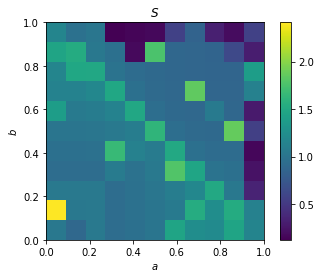

In [46]:
Z = entanglement_entropy
Z = np.vstack(Z[:, :]).astype(np.float)
plt.imshow(Z, extent=[a_list[0], a_list[-1], b_list[0], b_list[-1]], origin='lower',
           cmap='viridis')
plt.colorbar()
plt.axis(aspect='image')
plt.title(r"$S$")
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.show()
# plt.savefig(f'entanglement entropy L={L}.png')

This result is definitely not right.
However, we can't say for sure that the independent simulation must 

Let's try reproducing the finite-scaling of some special points directly.

In [ ]:
Jx = 1
Jy = 0.01
Jz = 0.01
chi_list = np.arange(30, 200, 10)
S_list = []

for chi in chi_list:
    data = run_atomic(
        Jx = Jx,
        Jy = Jy,
        Jz = Jz,
        L = L,
        chi = chi,
        N_sweeps_check=N_sweeps_check, 
        max_sweeps=max_sweeps, 
        verbose=verbose,
    )
    psi = data['psi']
    S_list.append(float(np.mean(psi.entanglement_entropy())))


Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

.........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062624812558, S = nan, norm_err = 2.0e-12
Current memory usage 353.9 MB, time elapsed: 5.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4300e-12, max_E_trunc = 7.1054e-14
MPS bond dimensions: [17, 16, 13, 20, 17, 20, 17, 29, 26, 30, 30, 30, 30, 30, 30, 24]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657126700, S = nan, norm_err = 3.8e-12
Current memory usage 353.9 MB, time elapsed: 9.2 s
Delta E = -6.4628e-10, Delta S = 0.0000e+00 (per sweep)
max_tru

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are depre

The norm is:  1.0
The overlap is:  (0.9999999999999987-2.53843549706462e-18j)
After the canonicalization:
Bond dim =  [8, 10, 8, 12, 8, 12, 11, 17, 15, 17, 18, 24, 20, 19, 14, 16]
Computing properties
Optimizing
Loop for chi=30 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  40 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for conf

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (0.9999999999999987+5.587595799141456e-17j)
After the canonicalization:
Bond dim =  [36, 33, 36, 40, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 38]
Computing properties
Optimizing
Loop for chi=40 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  50 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062636675199, S = nan, norm_err = 2.5e-12
Current memory usage 353.9 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.6258e-15, max_E_trunc = 2.0428e-14
MPS bond dimensions: [14, 15, 11, 17, 18, 15, 21, 27, 38, 43, 44, 49, 48, 49, 44, 23]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062637572849, S = nan, norm_err = 3.1e-12
Current memory usage 353.9 MB, time elapsed: 16.4 s
Delta E = -1.7953e-11, Delta S = 0.0000e+00 (per sweep)
max_t

Updating environment
..
sweep 95, age = 4592
Energy = -0.1250062623548516, S = 0.8669008428720069, norm_err = 1.7e-06
Current memory usage 353.9 MB, time elapsed: 178.1 s
Delta E = -1.0008e-11, Delta S = -3.5393e-04 (per sweep)
max_trunc_err = 4.0990e-14, max_E_trunc = 1.4211e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 100, age = 4816
Energy = -0.1250062623952886, S = 0.8655708853970500, norm_err = 1.5e-07
Current memory usage 353.9 MB, time elapsed: 188.6 s
Delta E = -8.0874e-12, Delta S = -2.6599e-04 (per sweep)
max_trunc_err = 8.7255e-14, max_E_trunc = 3.0695e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 105, age = 5040
Energy = -0.1250062624438861, S = 0.8638168964984917, norm_err = 6.5e-08
Current memory usage 353.9 MB, time elapsed: 198.4 s
Delta E = -9.7195e-12, Delta S = -3.5080e-04 (per sweep)
max_trunc_err = 2.6756e-13, max_E_tr

Updating environment
..
sweep 190, age = 8848
Energy = -0.1250062629970330, S = 0.8371358549312327, norm_err = 1.7e-07
Current memory usage 353.9 MB, time elapsed: 367.7 s
Delta E = -3.6010e-12, Delta S = -3.0139e-04 (per sweep)
max_trunc_err = 1.4116e-13, max_E_trunc = 2.9559e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 195, age = 9072
Energy = -0.1250062630286024, S = 0.8357547570350219, norm_err = 5.5e-07
Current memory usage 353.9 MB, time elapsed: 377.4 s
Delta E = -6.3139e-12, Delta S = -2.7622e-04 (per sweep)
max_trunc_err = 3.4193e-14, max_E_trunc = 2.0464e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 200, age = 9296
Energy = -0.1250062630395234, S = 0.8344050262371494, norm_err = 8.5e-08
Current memory usage 353.9 MB, time elapsed: 387.0 s
Delta E = -2.1842e-12, Delta S = -2.6995e-04 (per sweep)
max_trunc_err = 7.8444e-14, max_E_t

Updating environment
..
sweep 285, age = 13104
Energy = -0.1250062634347699, S = 0.8164705832475319, norm_err = 4.3e-07
Current memory usage 353.9 MB, time elapsed: 554.6 s
Delta E = -3.9250e-12, Delta S = -1.4252e-04 (per sweep)
max_trunc_err = 4.6141e-14, max_E_trunc = 2.9559e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 290, age = 13328
Energy = -0.1250062634607758, S = 0.8154446561649129, norm_err = 3.0e-08
Current memory usage 353.9 MB, time elapsed: 564.2 s
Delta E = -5.2012e-12, Delta S = -2.0519e-04 (per sweep)
max_trunc_err = 7.1729e-14, max_E_trunc = 3.6380e-12
MPS bond dimensions: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Updating environment
..
sweep 295, age = 13552
Energy = -0.1250062634809623, S = 0.8144311768184809, norm_err = 5.5e-08
Current memory usage 353.9 MB, time elapsed: 573.8 s
Delta E = -4.0373e-12, Delta S = -2.0270e-04 (per sweep)
max_trunc_err = 5.2169e-14, max_

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/algorithms/dmrg.py:408: UserWarning: final DMRG state not in canonical form within `norm_tol` = 1.00e-05
  warnings.warn(msg.format(nt=norm_tol))


..
Updating environment
..
Updating environment
..
DMRG finished after 360 sweeps.
total size = 16656, maximum chi = 50
Before the canonicalization:
Bond dim =  [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
Canonicalizing...


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000002816753963-2.2143164749077276e-15j)
After the canonicalization:
Bond dim =  [47, 48, 49, 50, 50, 50, 50, 50, 48, 48, 48, 49, 46, 47, 49, 49]
Computing properties
Optimizing
Loop for chi=50 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  60 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062604362245, S = nan, norm_err = 1.1e-11
Current memory usage 353.9 MB, time elapsed: 9.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0098e-15, max_E_trunc = 8.8818e-14
MPS bond dimensions: [21, 16, 17, 30, 47, 45, 55, 60, 59, 60, 60, 60, 60, 58, 56, 33]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062617345882, S = nan, norm_err = 5.5e-12
Current memory usage 353.9 MB, time elapsed: 22.8 s
Delta E = -2.5967e-10, Delta S = 0.0000e+00 (per sweep)
max_t

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


The norm is:  1.0
The overlap is:  (1.0000000000000784-3.242848697904144e-16j)
After the canonicalization:
Bond dim =  [51, 48, 50, 49, 50, 49, 50, 56, 57, 59, 59, 59, 57, 53, 52, 50]
Computing properties
Optimizing
Loop for chi=60 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderModel
Reading 'conserve'=None for config KitaevLadderModel
Reading 'Jx'=1 for config KitaevLadderModel
Reading 'Jy'=0.01 for config KitaevLadderModel
Reading 'Jz'=0.01 for config KitaevLadderModel


==============================START==============================
Chi =  70 

Subconfig 'trunc_params'=Config(name='trunc_params', config={'chi_max': 4, 'svd_min': 1e-10, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:84: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  L = get_parameter(model_params, 'L', 3, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:79: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  conserve = get_parameter(model_params, 'conserve', None, self.name)
/home/jerry/Documents/KitaevLadder/kitaev_ladder.py:91: FutureWarning: Old-style parameter dictionaries are deprecated in favor of `Config` class objects. Use `Config` methods to read out parameters. In particular, inside models just use `model_params.get(key, default)`.
  Jx = get_parameter(model_params, 'Jx', 1., self.name, True)

..........
Reading 'N_sweeps_check'=5 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=1000 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(name='mixer_params', config={'amplitude': 0.0001, 'decay': 1.2, 'disable_after': 50, 'verbose': 0.1}) for config TwoSiteDMRGEngine
Updating environment
..
sweep 5, age = 560
Energy = -0.1250062657409768, S = nan, norm_err = 3.7e-12
Current memory usage 353.9 MB, time elapsed: 3.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7976e-20, max_E_trunc = 8.8818e-15
MPS bond dimensions: [15, 14, 10, 17, 18, 17, 15, 21, 18, 16, 18, 20, 17, 16, 18, 17]
Updating environment
..
sweep 10, age = 784
Energy = -0.1250062657431741, S = nan, norm_err = 2.8e-12
Current memory usage 353.9 MB, time elapsed: 12.4 s
Delta E = -4.3947e-13, Delta S = 0.0000e+00 (per sweep)
max_t

Tests with increasing, non-canonical method.